In [1445]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1446]:
df=pd.read_csv('C:/Users/Nastaran/Desktop/autos_mpg_final.csv')

## General overveiw of Dataset

In [1447]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [1448]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

#### This Dataset has 398 values

In [1449]:
df.value_counts().shape[0] 

398

In [1450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [1451]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [1452]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [1453]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### Missing values shown:
### 6 values are missed

In [1454]:
missing_value = pd.DataFrame(df.horsepower.str.isdigit())  

#print missing_value = False!

df[missing_value['horsepower'] == False]   # prints only those rows where hosepower is false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


## DO these things for Missing values:
* Fill by NaN
* Fill NaN by median 

In [1455]:
df = df.replace('?', np.nan)
df[missing_value['horsepower'] == False] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [1456]:
df = df.fillna(df.median())

C:\Users\Nastaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [1457]:
df.tail(30)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
368,27.0,4,112.0,88,2640,18.6,82,1,chevrolet cavalier wagon
369,34.0,4,112.0,88,2395,18.0,82,1,chevrolet cavalier 2-door
370,31.0,4,112.0,85,2575,16.2,82,1,pontiac j2000 se hatchback
371,29.0,4,135.0,84,2525,16.0,82,1,dodge aries se
372,27.0,4,151.0,90,2735,18.0,82,1,pontiac phoenix
373,24.0,4,140.0,92,2865,16.4,82,1,ford fairmont futura
374,23.0,4,151.0,93.5,3035,20.5,82,1,amc concord dl
375,36.0,4,105.0,74,1980,15.3,82,2,volkswagen rabbit l
376,37.0,4,91.0,68,2025,18.2,82,3,mazda glc custom l
377,31.0,4,91.0,68,1970,17.6,82,3,mazda glc custom


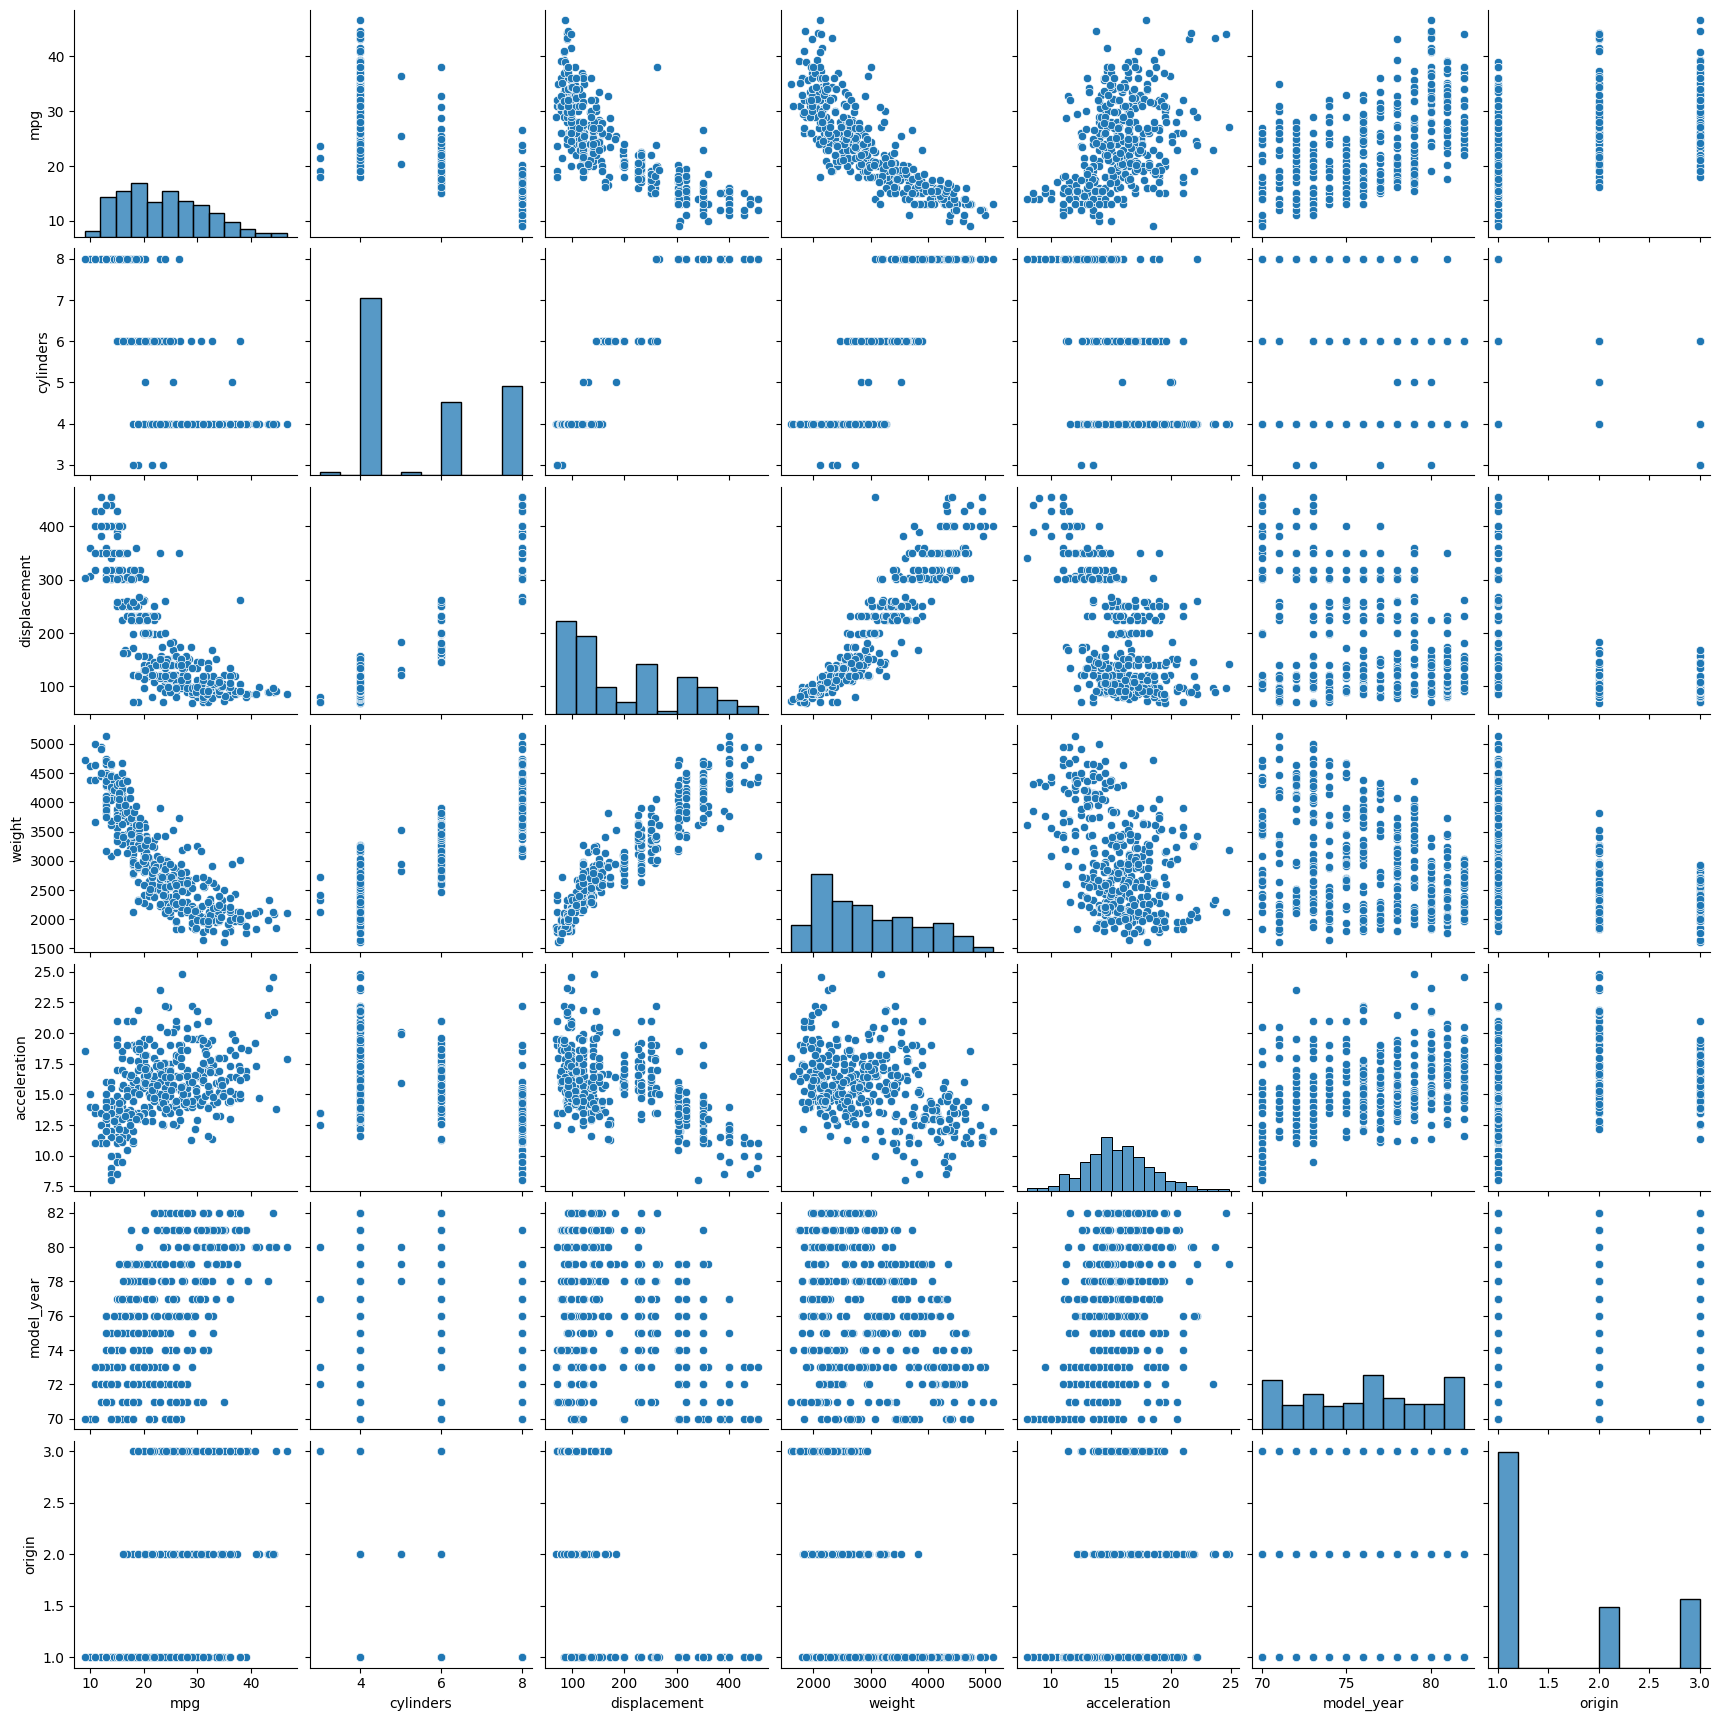

In [1458]:
sns.pairplot(df)

In [1297]:
df.tail(30)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
368,27.0,4,112.0,88,2640,18.6,82,1,chevrolet cavalier wagon
369,34.0,4,112.0,88,2395,18.0,82,1,chevrolet cavalier 2-door
370,31.0,4,112.0,85,2575,16.2,82,1,pontiac j2000 se hatchback
371,29.0,4,135.0,84,2525,16.0,82,1,dodge aries se
372,27.0,4,151.0,90,2735,18.0,82,1,pontiac phoenix
373,24.0,4,140.0,92,2865,16.4,82,1,ford fairmont futura
374,23.0,4,151.0,93.5,3035,20.5,82,1,amc concord dl
375,36.0,4,105.0,74,1980,15.3,82,2,volkswagen rabbit l
376,37.0,4,91.0,68,2025,18.2,82,3,mazda glc custom l
377,31.0,4,91.0,68,1970,17.6,82,3,mazda glc custom


### در نمودارهای زیر رابطه هر دو از متغیرها را باهم مقایسه میکنیم

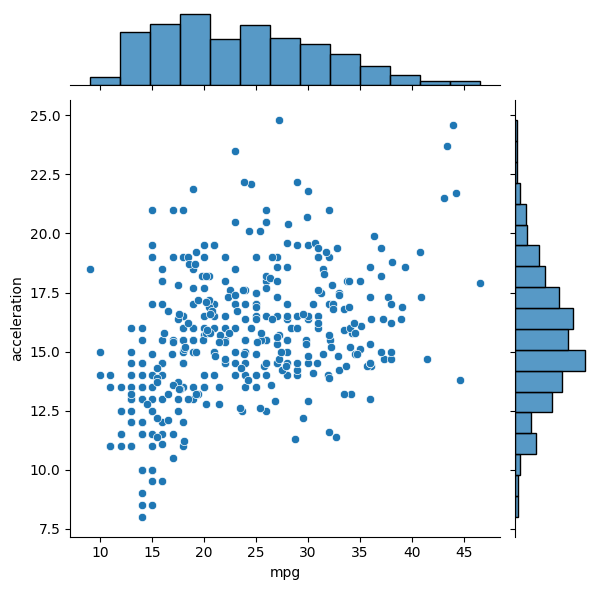

In [1298]:
sns.jointplot(data=df,x='mpg',y='acceleration')

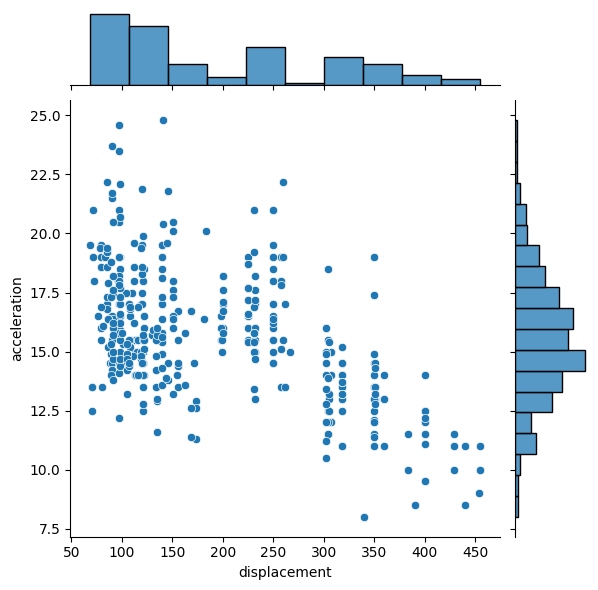

In [1299]:
sns.jointplot(data=df,x='displacement',y='acceleration')

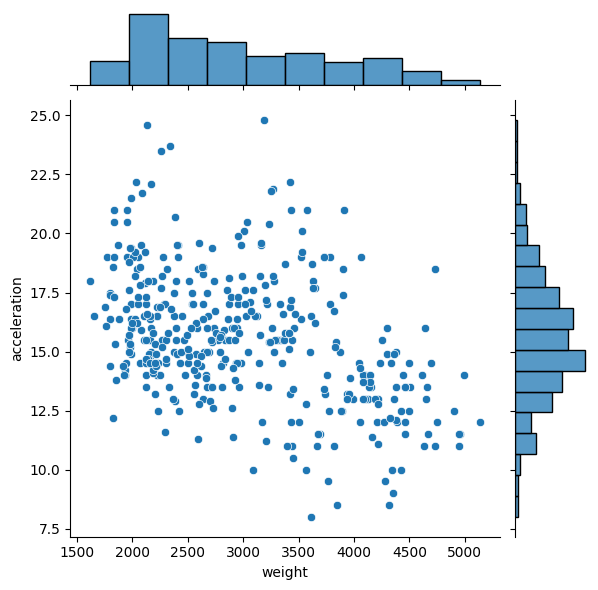

In [1300]:
sns.jointplot(data=df,x='weight',y='acceleration')

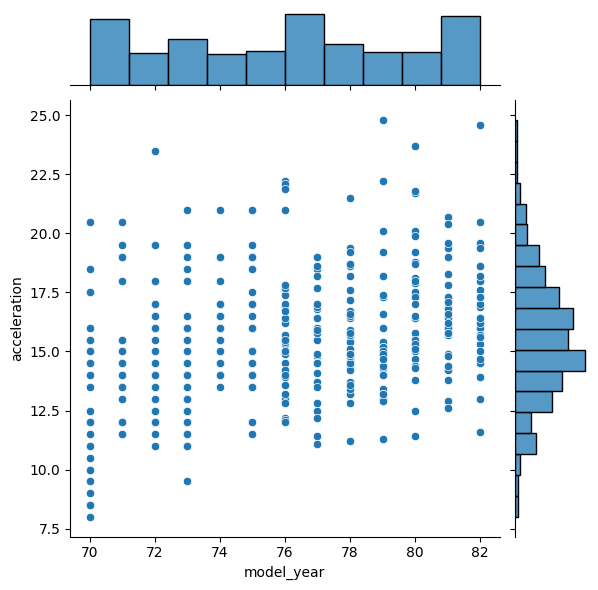

In [1301]:
sns.jointplot(data=df,x='model_year',y='acceleration')

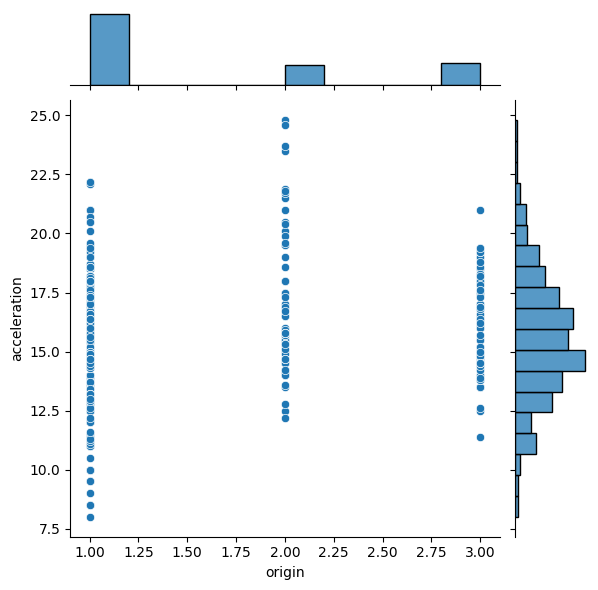

In [1302]:
sns.jointplot(data=df,x='origin',y='acceleration')

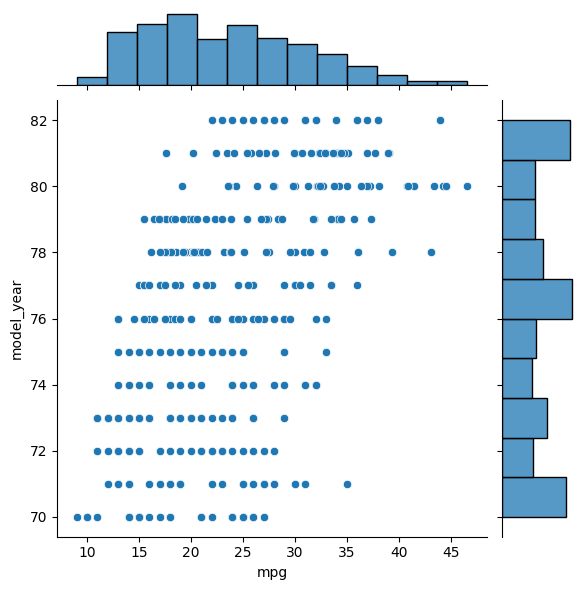

In [1303]:
sns.jointplot(data=df,x='mpg',y='model_year')

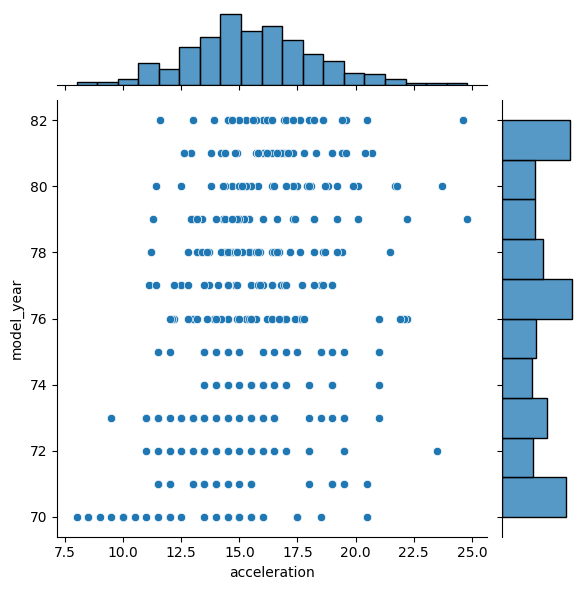

In [1304]:
sns.jointplot(data=df,x='acceleration',y='model_year')

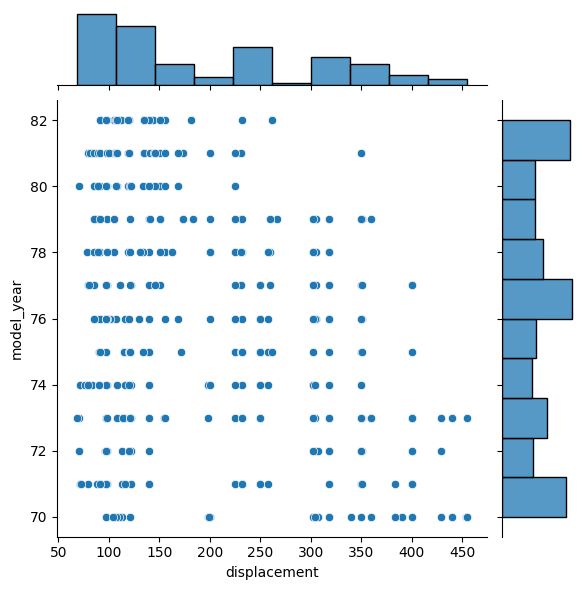

In [1305]:
sns.jointplot(data=df,x='displacement',y='model_year')

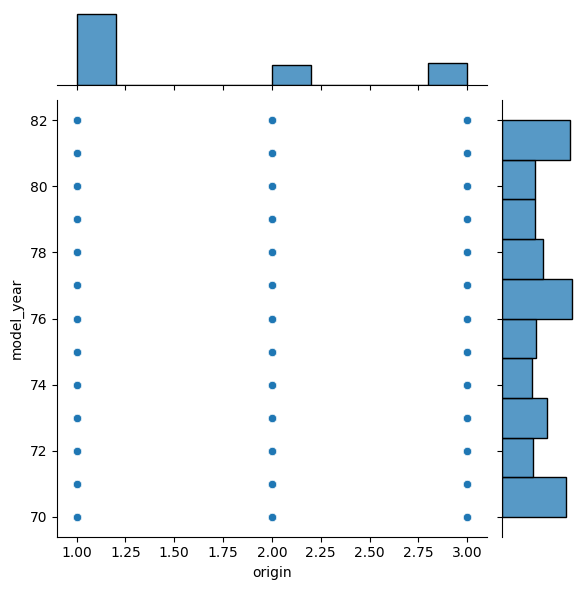

In [1306]:
sns.jointplot(data=df,x='origin',y='model_year')

### Checking Correlation between variables

In [1459]:
correl=df.corr()
correl

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


### As we can see type of "hosepower" is Object. So, It's better to change the type to the float. by this way you can easily compare with another variables.


In [1308]:
df["horsepower"] = df.horsepower.astype(float)

### By useing heatmap comparing variables with MPG can be easy.
* The variable which has the number upper than 0.5 has high correlation. such as: horsepower, cylinders, displacement,weight
* acceleration and MPG have low correlation.
* model-year and origin have a high correlation with MPG too.

<AxesSubplot:>

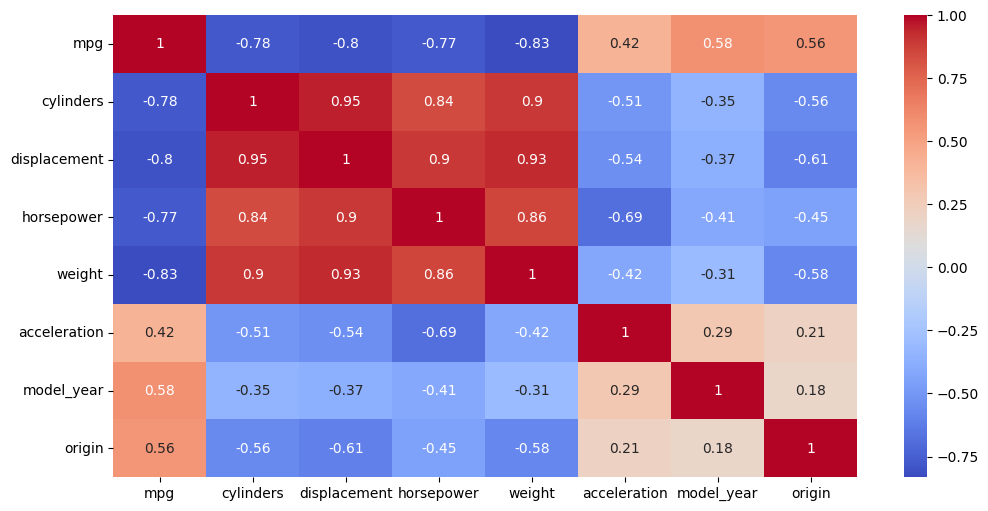

In [1309]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [1310]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [1311]:
X=df[['acceleration', 'displacement','cylinders', 'horsepower', 'model_year','weight','origin']]
X.head()

,acceleration,displacement,cylinders,horsepower,model_year,weight,origin
0,12.0,307.0,8,130.0,70,3504,1
1,11.5,350.0,8,165.0,70,3693,1
2,11.0,318.0,8,150.0,70,3436,1
3,12.0,304.0,8,150.0,70,3433,1
4,10.5,302.0,8,140.0,70,3449,1


### comparing the correlation of two by two variables

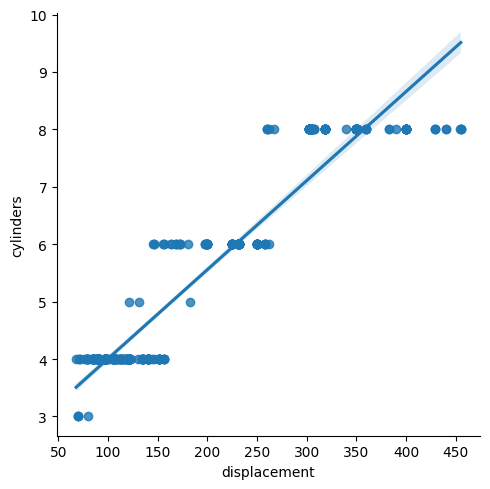

In [1312]:
sns.lmplot(x="displacement",y="cylinders",data=df)

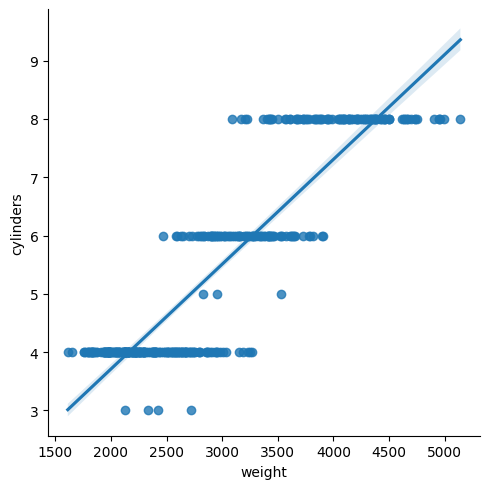

In [1313]:
sns.lmplot(x="weight",y="cylinders",data=df)

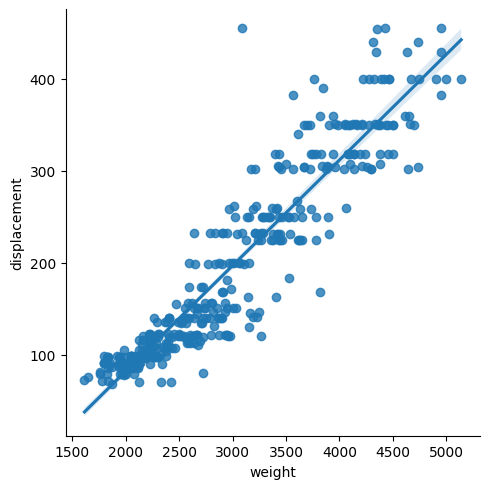

In [1314]:
sns.lmplot(x="weight",y="displacement",data=df)

# Data prepration

In [1315]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

### as we understood from above codes, we can remove accelleration beacause of low correlation and choose pther variables for independent variables.

In [1316]:
X=df[['displacement','cylinders', 'horsepower', 'model_year','weight','origin']]
X.head()

,displacement,cylinders,horsepower,model_year,weight,origin
0,307.0,8,130.0,70,3504,1
1,350.0,8,165.0,70,3693,1
2,318.0,8,150.0,70,3436,1
3,304.0,8,150.0,70,3433,1
4,302.0,8,140.0,70,3449,1


### . پس از انتخاب متغیرهای ورودی نوبت به هم مقیاس کردن و نرمالسازی میباشد

In [1317]:
from sklearn.preprocessing import StandardScaler
scaled_data=StandardScaler().fit_transform(X)
scaled_data

array([[ 1.0906037 ,  1.49819126,  0.67311762, -1.62742629,  0.63086987,
        -0.71514478],
       [ 1.5035143 ,  1.49819126,  1.58995818, -1.62742629,  0.85433297,
        -0.71514478],
       [ 1.19623199,  1.49819126,  1.19702651, -1.62742629,  0.55047045,
        -0.71514478],
       ...,
       [-0.56103873, -0.85632057, -0.53187283,  1.62198339, -0.79858454,
        -0.71514478],
       [-0.70507731, -0.85632057, -0.66285006,  1.62198339, -0.40841088,
        -0.71514478],
       [-0.71467988, -0.85632057, -0.58426372,  1.62198339, -0.29608816,
        -0.71514478]])

In [1318]:
X=pd.DataFrame(scaled_data,columns=X.columns)
X

,displacement,cylinders,horsepower,model_year,weight,origin
0,1.090604,1.498191,0.673118,-1.627426,0.630870,-0.715145
1,1.503514,1.498191,1.589958,-1.627426,0.854333,-0.715145
2,1.196232,1.498191,1.197027,-1.627426,0.550470,-0.715145
3,1.061796,1.498191,1.197027,-1.627426,0.546923,-0.715145
4,1.042591,1.498191,0.935072,-1.627426,0.565841,-0.715145
...,...,...,...,...,...,...
393,-0.513026,-0.856321,-0.479482,1.621983,-0.213324,-0.715145
394,-0.925936,-0.856321,-1.370127,1.621983,-0.993671,0.533222
395,-0.561039,-0.856321,-0.531873,1.621983,-0.798585,-0.715145
396,-0.705077,-0.856321,-0.662850,1.621983,-0.408411,-0.715145


In [1319]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(X)

print(normalized_data)

[[0.61757106 1.         0.45652174 0.         0.5361497  0.        ]
 [0.72868217 1.         0.64673913 0.         0.58973632 0.        ]
 [0.64599483 1.         0.56521739 0.         0.51686986 0.        ]
 ...
 [0.17312661 0.2        0.20652174 1.         0.19336547 0.        ]
 [0.13436693 0.2        0.17934783 1.         0.2869294  0.        ]
 [0.13178295 0.2        0.19565217 1.         0.31386447 0.        ]]


## our target is MPG here.

In [1320]:
y=df[[ 'mpg']]
y.head(10)

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
5,15.0
6,14.0
7,14.0
8,14.0
9,15.0


# Train test split

In [1321]:
from sklearn.model_selection import train_test_split

### using 30 percent of data for Test and 70 percent for Train 

In [1322]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3 ,random_state=101)

In [1323]:
X_train.head()

,displacement,cylinders,horsepower,model_year,weight,origin
41,1.196232,1.498191,1.197027,-1.356642,1.330818,-0.715145
31,-0.772295,-0.856321,-0.243723,-1.356642,-0.877802,1.781589
269,-0.849116,-0.856321,-0.767632,0.538847,-0.875437,-0.715145
32,-0.916334,-0.856321,-0.283016,-1.356642,-1.092988,-0.715145
259,0.063128,0.320935,-0.505677,0.538847,0.117732,-0.715145


In [1324]:
X_test.head()

,displacement,cylinders,horsepower,model_year,weight,origin
130,-0.685872,-0.856321,-0.636655,-0.544290,-0.614139,-0.715145
202,0.620078,0.320935,-0.243723,-0.002721,0.263161,-0.715145
322,-1.031565,-0.856321,-1.029586,1.080415,-1.017318,1.781589
104,1.983643,1.498191,1.642349,-0.815074,2.288517,-0.715145
91,1.983643,1.498191,1.197027,-0.815074,1.765921,-0.715145


In [1325]:
X_train.shape

(278, 6)

In [1326]:
X_test.shape

(120, 6)

# Model 1: Linear Regression


In [1327]:
from sklearn.linear_model import LinearRegression

In [1328]:
linreg =LinearRegression()

In [1329]:
linreg.fit(X_train,y_train)

LinearRegression()

In [1330]:
COE=pd.DataFrame()
COE['Variable']=X_train.columns
COE['Coef']=linreg.coef_[0,:]
COE

,Variable,Coef
0,displacement,2.166521
1,cylinders,-0.979911
2,horsepower,-0.622231
3,model_year,2.912391
4,weight,-5.585580
5,origin,1.001121


# Generalizability of the regression model

In [1331]:
pred1_train=linreg.predict(X_train)
pred1_train

array([[11.84328365],
       [25.61807177],
       [28.78529381],
       [24.03286821],
       [23.8976615 ],
       [20.5199406 ],
       [14.89308581],
       [11.53294102],
       [28.45463851],
       [16.11668257],
       [ 9.29433227],
       [29.85354342],
       [30.78387163],
       [20.47329691],
       [16.45024972],
       [19.68635803],
       [26.67716226],
       [23.3616447 ],
       [10.45988927],
       [27.37417857],
       [33.27964591],
       [17.83080414],
       [16.45911863],
       [27.07491842],
       [24.45423216],
       [22.20271888],
       [31.40101682],
       [33.38739516],
       [26.046502  ],
       [31.85904669],
       [16.78441685],
       [31.42708074],
       [21.67787557],
       [31.68642019],
       [11.15443432],
       [21.6897268 ],
       [25.97009664],
       [26.28069096],
       [22.80557762],
       [26.91949674],
       [22.90523156],
       [20.71544923],
       [23.69372216],
       [21.18483442],
       [20.93249008],
       [30

### Method 1 for normality (Histogeral)

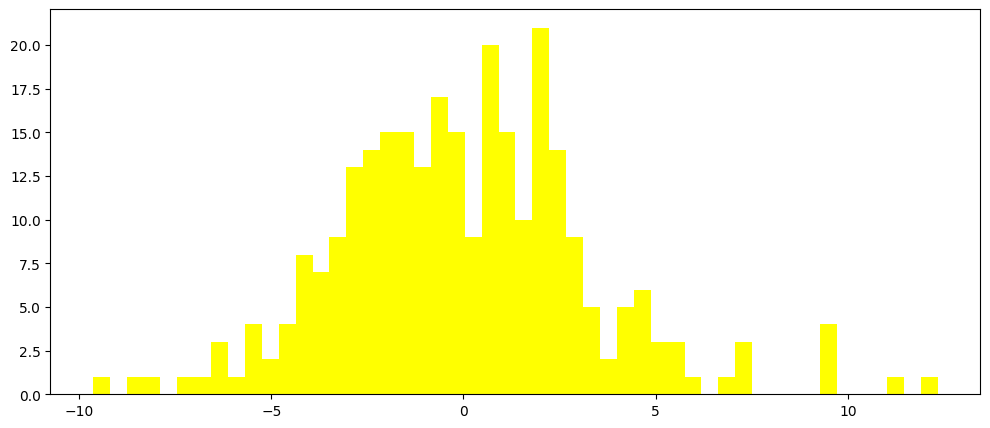

In [1332]:
plt.figure(figsize=(12,5))
plt.hist((y_train-pred1_train),bins=50,color='yellow');

In [1333]:
res1=(y_train-pred1_train)
res1.iloc[:,0]

41      2.156716
31     -0.618072
269     2.114706
32      0.967132
259    -3.097661
         ...    
63      1.978214
326    12.353083
337    -0.156347
11     -0.565537
351     2.009697
Name: mpg, Length: 278, dtype: float64

## Method 2 (qq-plot)

C:\Users\Nastaran\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


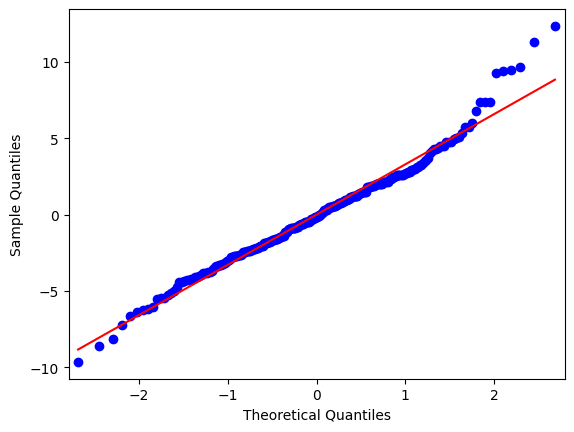

In [1334]:
import statsmodels.api as sm
sm.qqplot(res1.iloc[:,0], line='s');


 ## Dataset is normal
 ** for checking normalaity:
 * qq plot 
 * tests

## Method 3 (Noramlity test)

### Shapiro test

In [1335]:
import scipy.stats as ss
ss.shapiro(res1.iloc[:,0])

ShapiroResult(statistic=0.9803332686424255, pvalue=0.0007039953488856554)

#### آن بزرگتر از ۰.۰۵ است بنابراین با اکتفا به این دو میتوان نتیجه گرفت که داده هانرمال شده هستندp-valueکه عدد jarque باتوجه به هیستوگرام و آزمون 

### Jarque-Bera test


In [1336]:
import scipy.stats as ss
ss.jarque_bera(res1.iloc[:,0])

Jarque_beraResult(statistic=27.431392199674175, pvalue=1.1049658815709407e-06)

## The predicted value vs. Residual

Text(0.5, 1.0, 'The predicted value vs. Residual')

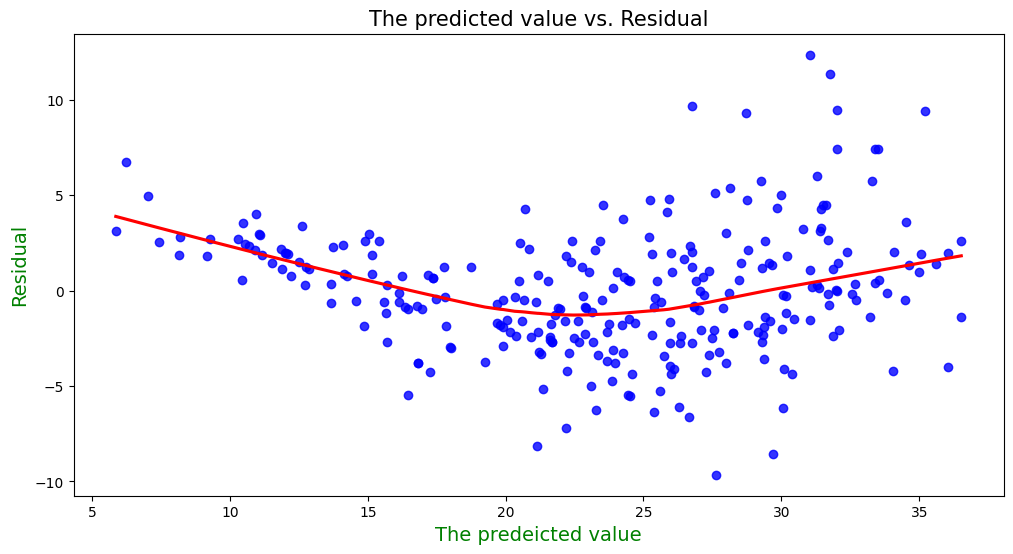

In [1337]:
plt.figure(figsize=(12,6))
sns.regplot(x=pred1_train,y=res1.iloc[:,0],
            line_kws={'color':'red'},
            lowess=True,scatter_kws={'color':'blue'})
plt.xlabel('The predeicted value',color='green',fontsize=14)
plt.ylabel('Residual',color='green',fontsize=14)
plt.title('The predicted value vs. Residual',fontsize=15)

## Model1: Prediction on Test dataset

In [1338]:
X_test.head()

,displacement,cylinders,horsepower,model_year,weight,origin
130,-0.685872,-0.856321,-0.636655,-0.544290,-0.614139,-0.715145
202,0.620078,0.320935,-0.243723,-0.002721,0.263161,-0.715145
322,-1.031565,-0.856321,-1.029586,1.080415,-1.017318,1.781589
104,1.983643,1.498191,1.642349,-0.815074,2.288517,-0.715145
91,1.983643,1.498191,1.197027,-0.815074,1.765921,-0.715145


In [1339]:
y_test.head()

,mpg
130,26.0
202,17.5
322,46.6
104,12.0
91,13.0


In [1340]:
pred_linreg=linreg.predict(X_test)
pred_linreg

array([[24.44344852],
       [22.55174761],
       [33.42229121],
       [ 9.50008673],
       [12.69618333],
       [26.56530201],
       [34.05844248],
       [25.45174015],
       [26.64089363],
       [24.3160871 ],
       [25.21461703],
       [26.65219248],
       [34.7043507 ],
       [28.23814086],
       [16.99307562],
       [18.03842063],
       [20.39320106],
       [19.7821744 ],
       [25.72648814],
       [25.47064815],
       [ 8.9305823 ],
       [24.17504202],
       [29.22876099],
       [20.15349634],
       [15.165646  ],
       [32.64767586],
       [25.77271389],
       [29.91154946],
       [16.86910602],
       [10.50961384],
       [20.37803187],
       [34.02326245],
       [25.02947453],
       [26.2029257 ],
       [26.74641067],
       [11.51826218],
       [28.42910248],
       [30.60497782],
       [15.52724338],
       [24.48989545],
       [32.56910765],
       [15.92941324],
       [26.79625406],
       [13.68788656],
       [20.74139727],
       [19

### Evaluating Regression models by using:
* MAE
* MSE
* RMSE

### Regression Evaluation Metrics

In [1341]:
from sklearn import metrics

In [1342]:
print('MAE',metrics.mean_absolute_error(y_test,pred_linreg))
print('MSE',metrics.mean_squared_error(y_test,pred_linreg))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,pred_linreg)))

MAE 2.5332589188073142
MSE 11.406889396622628
RMSE 3.3774086807229335


In [1343]:
modes_evaluate=pd.DataFrame({'MAE':metrics.mean_absolute_error(y_test,pred_linreg),
                           'MSE': metrics.mean_squared_error(y_test,pred_linreg),
                           'RMSE':np.sqrt(metrics.mean_squared_error(y_test,pred_linreg))}, index=['Linear Regression'])
modes_evaluate

,MAE,MSE,RMSE
Linear Regression,2.533259,11.406889,3.377409


### Actual vs. Prediction

Text(0, 0.5, 'Perdiction')

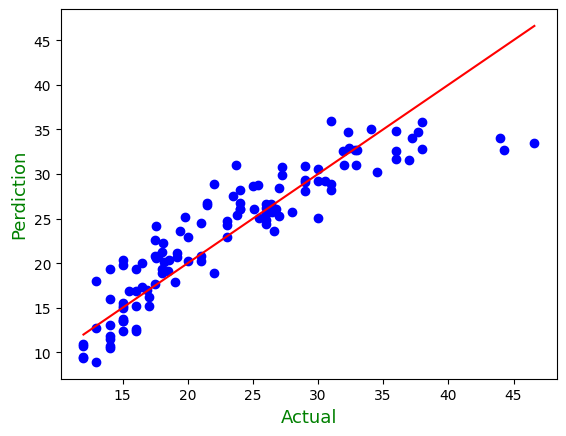

In [1344]:
plt.scatter(x=y_test,y=pred_linreg,color='blue')
xp=np.linspace(y_test.min(),y_test.max(),200)
plt.plot(xp,xp,color='red')

plt.xlabel('Actual',color='green',fontsize=13)
plt.ylabel('Perdiction',color='green',fontsize=13)

## Ridge Regression

In [1345]:
lambda_grid=10**np.linspace(5,-2,100)
lambda_grid

array([1.00000000e+05, 8.49753436e+04, 7.22080902e+04, 6.13590727e+04,
       5.21400829e+04, 4.43062146e+04, 3.76493581e+04, 3.19926714e+04,
       2.71858824e+04, 2.31012970e+04, 1.96304065e+04, 1.66810054e+04,
       1.41747416e+04, 1.20450354e+04, 1.02353102e+04, 8.69749003e+03,
       7.39072203e+03, 6.28029144e+03, 5.33669923e+03, 4.53487851e+03,
       3.85352859e+03, 3.27454916e+03, 2.78255940e+03, 2.36448941e+03,
       2.00923300e+03, 1.70735265e+03, 1.45082878e+03, 1.23284674e+03,
       1.04761575e+03, 8.90215085e+02, 7.56463328e+02, 6.42807312e+02,
       5.46227722e+02, 4.64158883e+02, 3.94420606e+02, 3.35160265e+02,
       2.84803587e+02, 2.42012826e+02, 2.05651231e+02, 1.74752840e+02,
       1.48496826e+02, 1.26185688e+02, 1.07226722e+02, 9.11162756e+01,
       7.74263683e+01, 6.57933225e+01, 5.59081018e+01, 4.75081016e+01,
       4.03701726e+01, 3.43046929e+01, 2.91505306e+01, 2.47707636e+01,
       2.10490414e+01, 1.78864953e+01, 1.51991108e+01, 1.29154967e+01,
      

In [1346]:
from sklearn.linear_model import Ridge,RidgeCV

In [1347]:
ridgereg=Ridge()

In [1348]:
models=pd.DataFrame(index=lambda_grid,columns=X_train.columns)
models

,displacement,cylinders,horsepower,model_year,weight,origin
100000.000000,NaN,NaN,NaN,NaN,NaN,NaN
84975.343591,NaN,NaN,NaN,NaN,NaN,NaN
72208.090184,NaN,NaN,NaN,NaN,NaN,NaN
61359.072734,NaN,NaN,NaN,NaN,NaN,NaN
52140.082880,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
0.019179,NaN,NaN,NaN,NaN,NaN,NaN
0.016298,NaN,NaN,NaN,NaN,NaN,NaN
0.013849,NaN,NaN,NaN,NaN,NaN,NaN
0.011768,NaN,NaN,NaN,NaN,NaN,NaN


In [1349]:
for i in lambda_grid:
    ridgereg.set_params(alpha=i)
    ridgereg.fit(X_train,y_train)
    models.loc[i,:]=ridgereg.coef_


In [1350]:
models.head()

,displacement,cylinders,horsepower,model_year,weight,origin
100000.000000,-0.016572,-0.016237,-0.016377,0.012695,-0.017388,0.011418
84975.343591,-0.019461,-0.019067,-0.019234,0.014918,-0.020423,0.013408
72208.090184,-0.022846,-0.022383,-0.02258,0.017526,-0.023978,0.015741
61359.072734,-0.026807,-0.026264,-0.026497,0.020583,-0.028142,0.01847
52140.082880,-0.031439,-0.030802,-0.031079,0.024165,-0.033013,0.021663


In [1351]:
models.tail()

,displacement,cylinders,horsepower,model_year,weight,origin
0.019179,2.159632,-0.977796,-0.621821,2.912004,-5.581374,1.000771
0.016298,2.160665,-0.978113,-0.621882,2.912062,-5.582005,1.000823
0.013849,2.161544,-0.978383,-0.621934,2.912112,-5.582542,1.000868
0.011768,2.162291,-0.978612,-0.621979,2.912154,-5.582998,1.000906
0.010000,2.162926,-0.978807,-0.622017,2.912189,-5.583386,1.000938


### Plot the lamda vs. the coeficent of variables

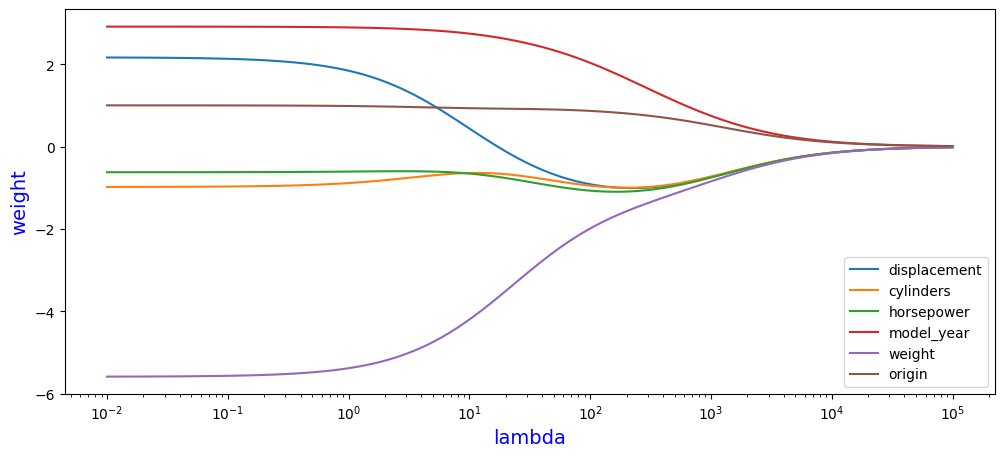

In [1352]:
plt.figure(figsize=(12,5))
plot_ridge=plt.gca() 
plot_ridge.plot(lambda_grid,models) 
plot_ridge.set_xscale('log')       
plt.xlabel('lambda',color='blue',fontsize=14)
plt.ylabel('weight', color='blue',fontsize=14)
plot_ridge.legend(models.columns) 

In [1353]:
models.columns

Index(['displacement', 'cylinders', 'horsepower', 'model_year', 'weight',
       'origin'],
      dtype='object')

### K fold cross validation for  Ridge Regression

### Method 1

In [1354]:
from sklearn.model_selection import cross_val_score
er=[]
for i in lambda_grid:
    ridgereg.set_params(alpha=i)
    Scores=cross_val_score(ridgereg,X=X_train,y=y_train,
                           cv=10,scoring='neg_mean_squared_error')
    er.append(-np.mean(Scores))

In [1355]:
er

[59.593084682002974,
 59.43446302355035,
 59.248878946928144,
 59.03196954349805,
 58.77874832885421,
 58.48354719247749,
 58.1399654078934,
 57.74083203894912,
 57.278190297883796,
 56.74331501833067,
 56.12677728492961,
 55.41857315028825,
 54.60833579846532,
 53.68565173026661,
 52.6405004650381,
 51.46383246404008,
 50.14828986402745,
 48.68905765853475,
 47.084808358607134,
 45.33867162360128,
 43.45912513603911,
 41.46067071171392,
 39.364140274380084,
 37.19648178696394,
 34.98991592390983,
 32.78043407435364,
 30.605719527743588,
 28.502694982257815,
 26.504998915715426,
 24.640738031620693,
 22.930832201446066,
 21.388163939151948,
 20.01759286520734,
 18.81673893338717,
 17.777318321951604,
 16.886759418529152,
 16.129837055361662,
 15.490124646102032,
 14.951149085756086,
 14.497215651193807,
 14.113931538915116,
 13.788490119506752,
 13.509785981608664,
 13.268421379457427,
 13.056647103217127,
 12.868262739871147,
 12.698487522567818,
 12.543805315278654,
 12.4017854314738

Text(0.5, 1.0, 'mean_squared_error vs lambda')

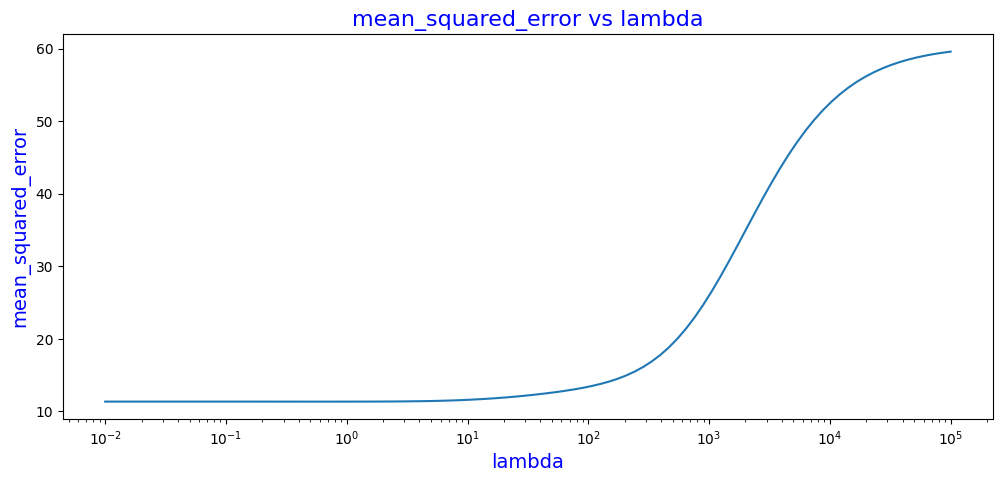

In [1356]:
plt.figure(figsize=(12,5))
plot_ridge=plt.gca()
plot_ridge.plot(lambda_grid,er)
plot_ridge.set_xscale('log')
plt.xlabel('lambda',color='blue',fontsize=14)
plt.ylabel('mean_squared_error', color='blue',fontsize=14)
plt.title('mean_squared_error vs lambda', color='blue',fontsize=16)

### Method 2

In [1357]:
redgecv=RidgeCV(alphas=lambda_grid, cv=10,scoring='neg_mean_squared_error' )
redgecv.fit(X_train,y_train)
redgecv.alpha_ 

0.5857020818056673

In [1358]:
redgecv.coef_

array([[ 1.968432  , -0.92081815, -0.61166129,  2.90072168, -5.4616515 ,
         0.99123877]])

## Prediction 

In [1359]:
redgreg=Ridge(alpha=redgecv.alpha_)

In [1360]:
redgreg.fit(X_train,y_train)

Ridge(alpha=0.5857020818056673)

In [1361]:
pred_ridge=redgreg.predict(X_test)
pred_ridge

array([[24.45653864],
       [22.48226673],
       [33.40610864],
       [ 9.51047942],
       [12.63710451],
       [26.58861684],
       [34.02668463],
       [25.45760946],
       [26.60216613],
       [24.32015604],
       [25.21346911],
       [26.67569469],
       [34.6580446 ],
       [28.22954907],
       [16.99629239],
       [18.02195316],
       [20.37074901],
       [19.75656798],
       [25.74821689],
       [25.495728  ],
       [ 8.92468086],
       [24.18962045],
       [29.21470654],
       [20.13438605],
       [15.21291752],
       [32.58514312],
       [25.75973454],
       [29.88461524],
       [16.90129369],
       [10.37044591],
       [20.43172293],
       [33.99374598],
       [25.04588228],
       [26.22855393],
       [26.81817686],
       [11.52740011],
       [28.42782735],
       [30.56265833],
       [15.52347871],
       [24.46236498],
       [32.55203556],
       [15.93689365],
       [26.76726348],
       [13.73076252],
       [20.78356038],
       [19

####  As it turns out from results, regression model and rige regression has no difference. 

In [1362]:
modes_evaluate=modes_evaluate.append(pd.DataFrame({'MAE':metrics.mean_absolute_error(y_test,pred_ridge),
                           'MSE': metrics.mean_squared_error(y_test,pred_ridge),
                           'RMSE':np.sqrt(metrics.mean_squared_error(y_test,pred_ridge))}, index=['Ridge Regression']))
modes_evaluate



,MAE,MSE,RMSE
Linear Regression,2.533259,11.406889,3.377409
Ridge Regression,2.532992,11.381738,3.373683


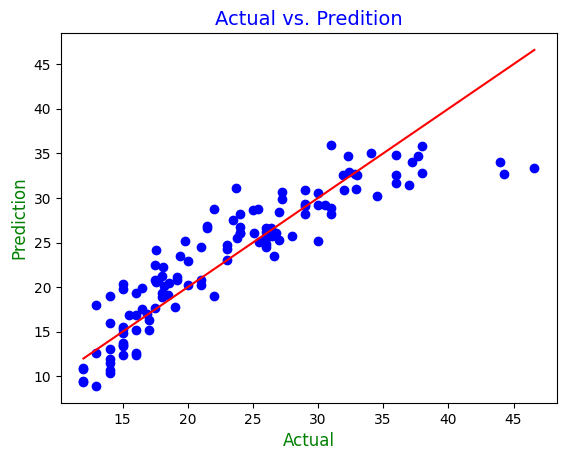

In [1363]:
plt.scatter(x=y_test,y=pred_ridge,color='blue')
plt.xlabel('Actual',color='green',fontsize=12)
plt.ylabel('Prediction',color='green',fontsize=12)
plt.title('Actual vs. Predition',color='blue',fontsize=14)

xp=np.linspace(y_test.min(),y_test.max(),100)
plt.plot(xp,xp,color='red')


## Lasso Regression

In [1364]:
lambda_grid=100**np.linspace(4,-2,100)
lambda_grid
#تولید  اعداد lambda

array([1.00000000e+08, 7.56463328e+07, 5.72236766e+07, 4.32876128e+07,
       3.27454916e+07, 2.47707636e+07, 1.87381742e+07, 1.41747416e+07,
       1.07226722e+07, 8.11130831e+06, 6.13590727e+06, 4.64158883e+06,
       3.51119173e+06, 2.65608778e+06, 2.00923300e+06, 1.51991108e+06,
       1.14975700e+06, 8.69749003e+05, 6.57933225e+05, 4.97702356e+05,
       3.76493581e+05, 2.84803587e+05, 2.15443469e+05, 1.62975083e+05,
       1.23284674e+05, 9.32603347e+04, 7.05480231e+04, 5.33669923e+04,
       4.03701726e+04, 3.05385551e+04, 2.31012970e+04, 1.74752840e+04,
       1.32194115e+04, 1.00000000e+04, 7.56463328e+03, 5.72236766e+03,
       4.32876128e+03, 3.27454916e+03, 2.47707636e+03, 1.87381742e+03,
       1.41747416e+03, 1.07226722e+03, 8.11130831e+02, 6.13590727e+02,
       4.64158883e+02, 3.51119173e+02, 2.65608778e+02, 2.00923300e+02,
       1.51991108e+02, 1.14975700e+02, 8.69749003e+01, 6.57933225e+01,
       4.97702356e+01, 3.76493581e+01, 2.84803587e+01, 2.15443469e+01,
      

### Construct the Dataframe for lamda_grid

In [1365]:
models=pd.DataFrame(index=lambda_grid,columns=X_train.columns)
models

,displacement,cylinders,horsepower,model_year,weight,origin
1.000000e+08,NaN,NaN,NaN,NaN,NaN,NaN
7.564633e+07,NaN,NaN,NaN,NaN,NaN,NaN
5.722368e+07,NaN,NaN,NaN,NaN,NaN,NaN
4.328761e+07,NaN,NaN,NaN,NaN,NaN,NaN
3.274549e+07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3.053856e-04,NaN,NaN,NaN,NaN,NaN,NaN
2.310130e-04,NaN,NaN,NaN,NaN,NaN,NaN
1.747528e-04,NaN,NaN,NaN,NaN,NaN,NaN
1.321941e-04,NaN,NaN,NaN,NaN,NaN,NaN


### Finding optimize alfa

In [1366]:
from sklearn.linear_model import Lasso, LassoCV


In [1367]:
lassoreg=Lasso()

In [1368]:
for i in lambda_grid:
    lassoreg.set_params(alpha=i) 
    lassoreg.fit(X_train,y_train) 
    models.loc[i,:]=lassoreg.coef_  
models        

,displacement,cylinders,horsepower,model_year,weight,origin
1.000000e+08,-0.0,-0.0,-0.0,0.0,-0.0,0.0
7.564633e+07,-0.0,-0.0,-0.0,0.0,-0.0,0.0
5.722368e+07,-0.0,-0.0,-0.0,0.0,-0.0,0.0
4.328761e+07,-0.0,-0.0,-0.0,0.0,-0.0,0.0
3.274549e+07,-0.0,-0.0,-0.0,0.0,-0.0,0.0
...,...,...,...,...,...,...
3.053856e-04,2.152084,-0.973185,-0.618997,2.912126,-5.581624,0.999711
2.310130e-04,2.155609,-0.974825,-0.619787,2.912191,-5.582591,1.000055
1.747528e-04,2.158269,-0.976067,-0.620387,2.912239,-5.583313,1.000315
1.321941e-04,2.160287,-0.977005,-0.620838,2.912276,-5.58387,1.000512


In [1369]:
models.head()

,displacement,cylinders,horsepower,model_year,weight,origin
1.000000e+08,-0.0,-0.0,-0.0,0.0,-0.0,0.0
7.564633e+07,-0.0,-0.0,-0.0,0.0,-0.0,0.0
5.722368e+07,-0.0,-0.0,-0.0,0.0,-0.0,0.0
4.328761e+07,-0.0,-0.0,-0.0,0.0,-0.0,0.0
3.274549e+07,-0.0,-0.0,-0.0,0.0,-0.0,0.0


In [1370]:
models.tail()

,displacement,cylinders,horsepower,model_year,weight,origin
0.000305,2.152084,-0.973185,-0.618997,2.912126,-5.581624,0.999711
0.000231,2.155609,-0.974825,-0.619787,2.912191,-5.582591,1.000055
0.000175,2.158269,-0.976067,-0.620387,2.912239,-5.583313,1.000315
0.000132,2.160287,-0.977005,-0.620838,2.912276,-5.58387,1.000512
0.000100,2.161809,-0.977716,-0.621181,2.912304,-5.584284,1.000661


### Plot the lamda vs. the coeficent of variables

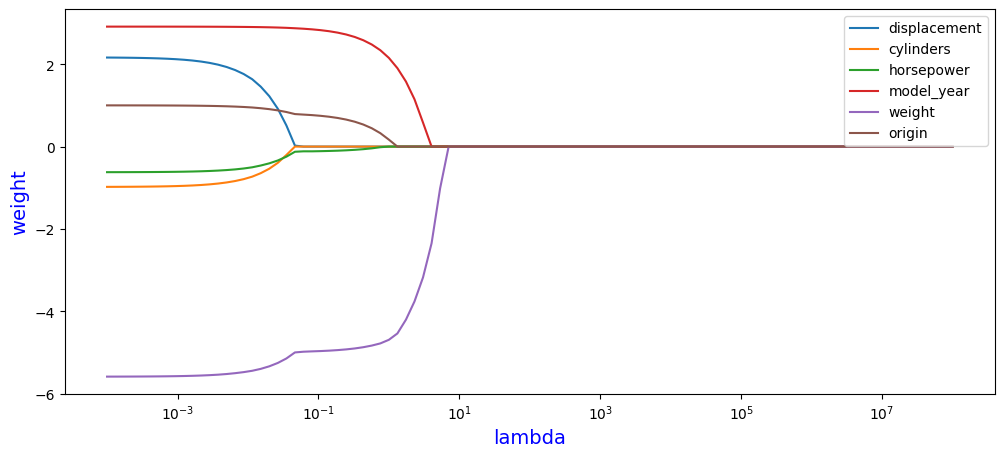

In [1371]:
plt.figure(figsize=(12,5))
plot_ridge=plt.gca()
plot_ridge.plot(lambda_grid,models)
plot_ridge.set_xscale('log')
plt.xlabel('lambda',color='blue',fontsize=14)
plt.ylabel('weight', color='blue',fontsize=14)
plot_ridge.legend(models.columns)

In [1372]:
models.columns

Index(['displacement', 'cylinders', 'horsepower', 'model_year', 'weight',
       'origin'],
      dtype='object')

### K fold cross validation for  Ridge Regression

In [1373]:
er=[]
for i in lambda_grid:  
    lassoreg.set_params(alpha=i)  # set the lambda
    Scores=cross_val_score(lassoreg,X=X_train,y=y_train,
                           cv=10,scoring='neg_mean_squared_error') 
    er.append(-np.mean(Scores)) 

In [1374]:
er

[60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,
 60.50643526626519,


Text(0.5, 1.0, 'mean_squared_error vs lambda')

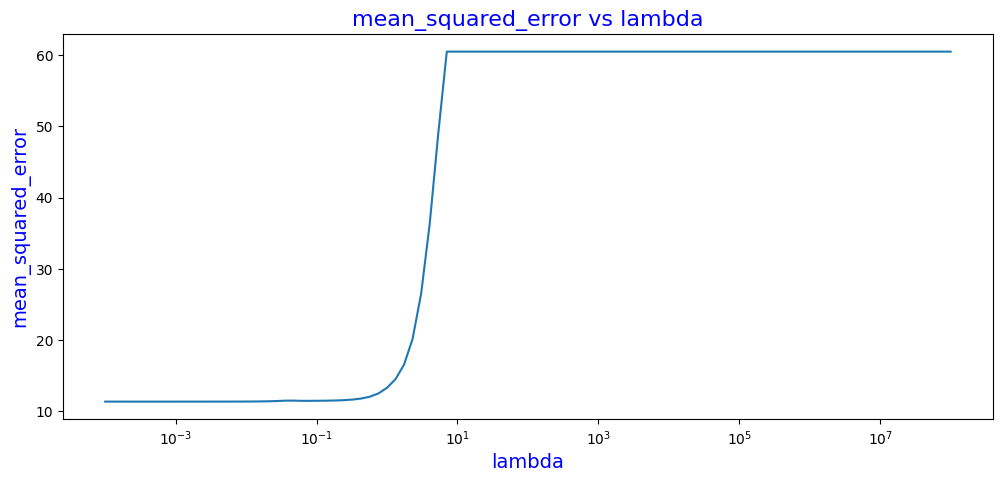

In [1375]:
plt.figure(figsize=(12,5))
plot_lasso=plt.gca()
plot_lasso.plot(lambda_grid,er)
plot_lasso.set_xscale('log')
plt.xlabel('lambda',color='blue',fontsize=14)
plt.ylabel('mean_squared_error', color='blue',fontsize=14)
plt.title('mean_squared_error vs lambda', color='blue',fontsize=16)
# هرچه لامبدا کمتر میشهmse هم کمتر میشه که خوبه

### Method 2

In [1376]:
lassocv= LassoCV(alphas=lambda_grid,cv=10,random_state=101)
lassocv.fit(X_train,y_train.values.ravel())
lassocv.alpha_  

0.0001

In [1377]:
lassocv.coef_

array([ 2.16180926, -0.97771591, -0.62118085,  2.91230355, -5.58428388,
        1.00066094])

## Prediction 

In [1378]:
lassoreg=Lasso(alpha=lassocv.alpha_)

In [1379]:
lassoreg.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [1380]:
pred_lasso=lassoreg.predict(X_test)
pred_lasso

array([24.44364965, 22.54988202, 33.42189572,  9.49905663, 12.69400822,
       26.56595667, 34.05774979, 25.45129156, 26.63986642, 24.31582085,
       25.21471905, 26.65230003, 34.70341996, 28.23811957, 16.99299976,
       18.03879861, 20.39145475, 19.7810746 , 25.72679875, 25.47137423,
        8.92943658, 24.17469373, 29.2288968 , 20.15350606, 15.16669069,
       32.6463355 , 25.77200813, 29.91116727, 16.86960964, 10.50702369,
       20.3786794 , 34.02272749, 25.02950398, 26.20339708, 26.7472377 ,
       11.51841835, 28.42933308, 30.60443469, 15.52772574, 24.48900899,
       32.56943164, 15.93036815, 26.79558912, 13.68920221, 20.7430948 ,
       19.37541671, 29.14173943, 22.96886365, 20.61226327, 32.71546884,
       21.26753657, 22.28753784, 22.98229429, 26.06547084, 15.1581225 ,
       28.19743556, 34.71774727, 24.87189036, 16.84294121, 31.65720515,
       30.75453778, 25.08627198, 35.09079802, 19.15537774, 21.14581001,
       23.55647832, 30.95765943, 32.57021357, 12.34450062, 13.05

In [1381]:
modes_evaluate=modes_evaluate.append(pd.DataFrame({'MAE':metrics.mean_absolute_error(y_test,pred_lasso),
                           'MSE': metrics.mean_squared_error(y_test,pred_lasso),
                           'RMSE':np.sqrt(metrics.mean_squared_error(y_test,pred_lasso))}, index=['Lasso Regression']))
modes_evaluate

,MAE,MSE,RMSE
Linear Regression,2.533259,11.406889,3.377409
Ridge Regression,2.532992,11.381738,3.373683
Lasso Regression,2.533258,11.406501,3.377351


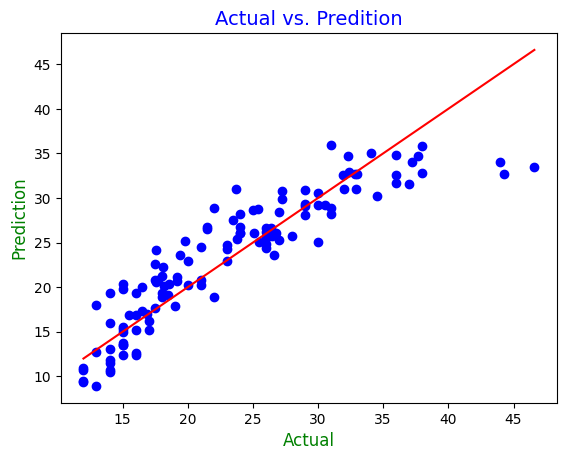

In [1382]:
plt.scatter(x=y_test,y=pred_lasso,color='blue')
plt.xlabel('Actual',color='green',fontsize=12)
plt.ylabel('Prediction',color='green',fontsize=12)
plt.title('Actual vs. Predition',color='blue',fontsize=14)
xp=np.linspace(y_test.min(),y_test.max(),100)
plt.plot(xp,xp,color='red')

## Decision Tree

In [1383]:
from sklearn.tree import DecisionTreeRegressor

In [1384]:
reg_tree=DecisionTreeRegressor(max_depth=3,
                               min_samples_leaf=5,
                               ccp_alpha=0.01)

In [1385]:
fit_tree=reg_tree.fit(X_train,y_train)

## plot the tree

In [1386]:
X.columns

Index(['displacement', 'cylinders', 'horsepower', 'model_year', 'weight',
       'origin'],
      dtype='object')

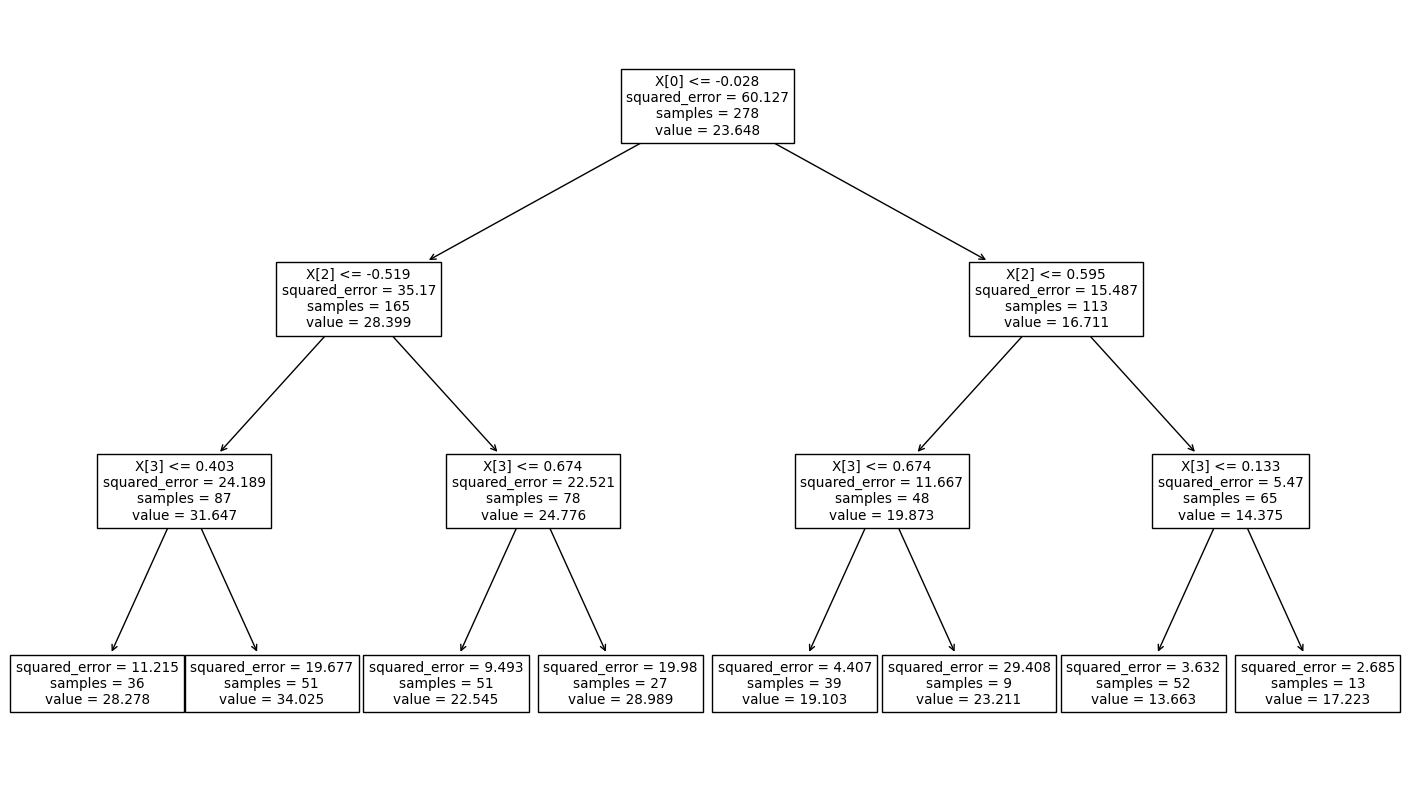

In [1387]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(fit_tree);


## K flod cross validation for Decision tree

In [1388]:
import itertools
max_depth=[4,6,8]
min_samples_leaf=[5,10,15]
ccp_alpha=[0.0001,0.001,0.01]
grid=list(itertools.product(max_depth,min_samples_leaf,ccp_alpha))
grid=pd.DataFrame(grid,index=range(1,28),columns=['max_depth','min_samples_leaf','ccp_alpha'])
grid

,max_depth,min_samples_leaf,ccp_alpha
1,4,5,0.0001
2,4,5,0.0010
3,4,5,0.0100
4,4,10,0.0001
5,4,10,0.0010
6,4,10,0.0100
7,4,15,0.0001
8,4,15,0.0010
9,4,15,0.0100
10,6,5,0.0001


In [1389]:
from sklearn.model_selection import cross_val_score
er=[]
for i in range(1,28):
    reg_tree=DecisionTreeRegressor(max_depth=grid.loc[i,'max_depth'],
                               min_samples_leaf=grid.loc[i,'min_samples_leaf'],
                               ccp_alpha=grid.loc[i,'ccp_alpha'],random_state=101)
    Scores=cross_val_score(reg_tree,X=X_train,y=y_train,
                           cv=10,scoring='neg_mean_squared_error')
    er.append(-np.mean(Scores))

In [1390]:
Scores

array([ -9.20323838,  -8.21694591, -31.98592623, -13.96073292,
        -8.06026393,  -6.09596127, -18.51923694, -12.94489254,
        -9.34716605, -12.32370265])

In [1391]:
er

[11.224507242183071,
 11.224507242183071,
 11.224507242183071,
 11.669695824972537,
 11.669695824972537,
 11.669695824972537,
 13.129109181212536,
 13.129109181212536,
 13.129109181212536,
 10.514846442337001,
 10.514846442337001,
 10.532655363237392,
 11.017020660382908,
 11.017020660382908,
 11.026156216343388,
 13.076818979510307,
 13.076818979510307,
 13.065806683997588,
 10.818648720718006,
 10.818648720718006,
 10.866751919436664,
 11.017020660382908,
 11.017020660382908,
 11.026156216343388,
 13.076818979510307,
 13.076818979510307,
 13.065806683997588]

Text(0, 0.5, 'mean_squared_error')

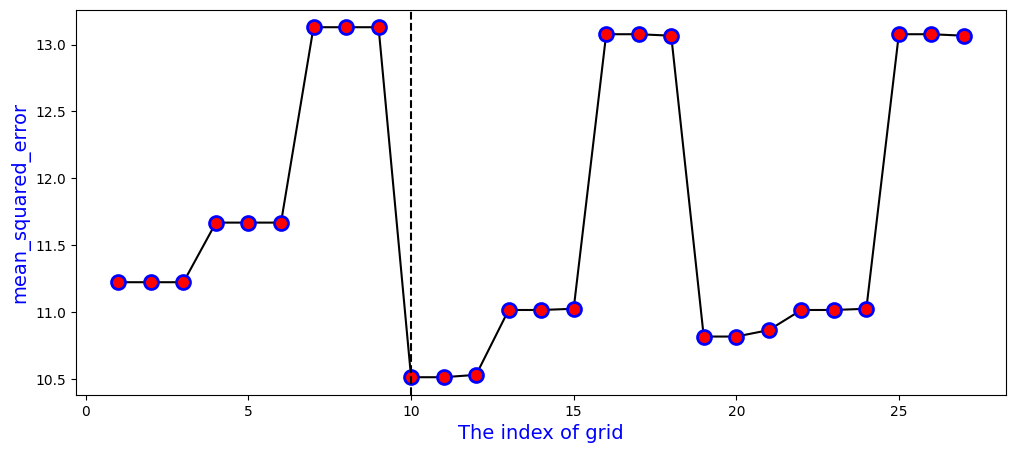

In [1392]:
plt.figure(figsize=(12,5))
plt.plot(range(1,28),er,marker='o',markersize=10,
         markerfacecolor='red',color='black',
        markeredgecolor='blue',markeredgewidth=2)
plt.axvline(np.argmin(er)+1,linestyle='--',color='black')
plt.xlabel('The index of grid',fontsize=14,color='blue')
plt.ylabel('mean_squared_error',fontsize=14,color='blue')

## Apply the best model

In [1393]:
reg_tree=DecisionTreeRegressor(max_depth=grid.loc[10,'max_depth'],
                               min_samples_leaf=grid.loc[10,'min_samples_leaf'],
                               ccp_alpha=grid.loc[10,'ccp_alpha'],random_state=101)
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0001, max_depth=6, min_samples_leaf=5,
                      random_state=101)

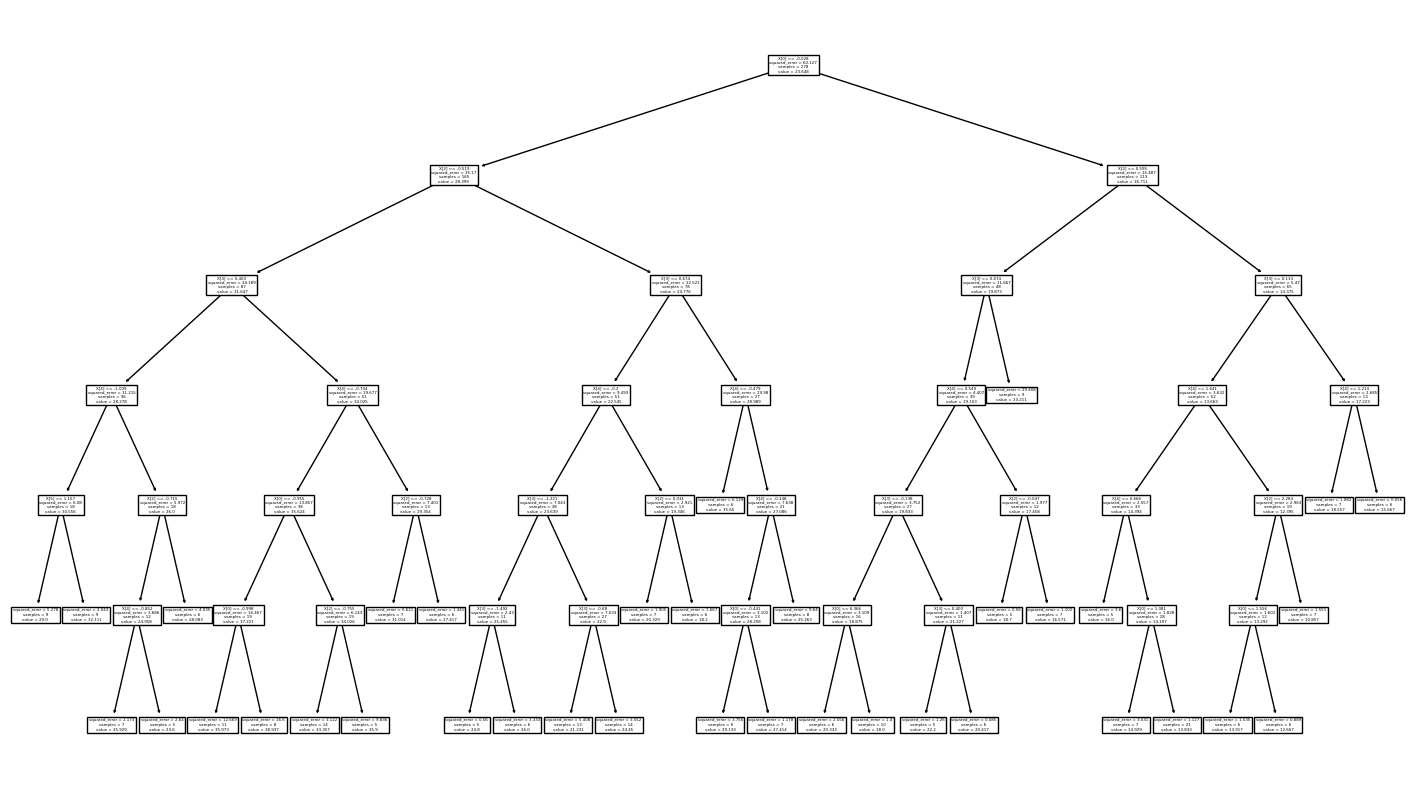

In [1394]:
fit_tree=reg_tree.fit(X_train,y_train)
from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(fit_tree);

### Prediction the dataset

In [1395]:
pred_tree=reg_tree.predict(X_test)
pred_tree

array([28.08333333, 22.2       , 35.97272727, 12.66666667, 12.66666667,
       24.45      , 33.35714286, 20.32857143, 29.        , 28.08333333,
       23.21111111, 25.2625    , 33.35714286, 32.11111111, 15.66666667,
       13.83333333, 18.        , 18.        , 21.23076923, 21.23076923,
       12.66666667, 23.21111111, 29.        , 18.55714286, 13.83333333,
       32.11111111, 23.6       , 27.41666667, 16.57142857, 10.85714286,
       16.57142857, 35.97272727, 24.45      , 28.08333333, 24.45      ,
       13.83333333, 28.08333333, 27.41666667, 13.83333333, 23.6       ,
       33.35714286, 14.92857143, 25.92857143, 14.92857143, 23.21111111,
       18.        , 25.92857143, 20.32857143, 18.55714286, 35.97272727,
       18.        , 20.41666667, 18.        , 24.45      , 16.        ,
       25.2625    , 35.97272727, 29.        , 18.7       , 29.        ,
       24.45      , 29.        , 38.9375    , 16.57142857, 16.57142857,
       20.41666667, 32.11111111, 35.97272727, 13.91666667, 13.83

In [1396]:
modes_evaluate=modes_evaluate.append(pd.DataFrame({'MAE':metrics.mean_absolute_error(y_test,pred_tree),
                           'MSE': metrics.mean_squared_error(y_test,pred_tree),
                           'RMSE':np.sqrt(metrics.mean_squared_error(y_test,pred_tree))}, 
                                                  index=['Decision Tree Regression']))
modes_evaluate

,MAE,MSE,RMSE
Linear Regression,2.533259,11.406889,3.377409
Ridge Regression,2.532992,11.381738,3.373683
Lasso Regression,2.533258,11.406501,3.377351
Decision Tree Regression,2.269258,9.605827,3.099327


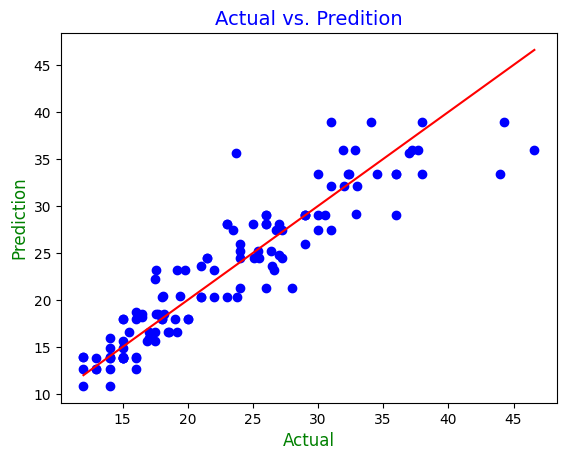

In [1397]:
plt.scatter(x=y_test,y=pred_tree,color='blue')
plt.xlabel('Actual',color='green',fontsize=12)
plt.ylabel('Prediction',color='green',fontsize=12)
plt.title('Actual vs. Predition',color='blue',fontsize=14)
xp=np.linspace(y_test.min(),y_test.max(),100)
plt.plot(xp,xp,color='red')

## Bagging

In [1398]:
from sklearn.ensemble import RandomForestRegressor

In [1399]:
bagging_reg=RandomForestRegressor(n_estimators=500,max_features=6,random_state=123)

In [1400]:
fit_bagging=bagging_reg.fit(X_train,y_train.values.ravel())

### Prediction

In [1401]:
pred_bagging=bagging_reg.predict(X_test)
pred_bagging

array([24.353     , 20.5864    , 38.36      , 12.284     , 13.084     ,
       24.5472    , 38.4912    , 22.8768    , 27.7758    , 24.525     ,
       22.9632    , 24.7496    , 34.8284    , 31.9812    , 16.1316    ,
       14.7       , 17.3304    , 17.918     , 22.135     , 23.4       ,
       12.754     , 22.758     , 30.9534    , 17.7878    , 14.847     ,
       31.6126    , 24.7582    , 31.4306    , 17.2312    , 11.65      ,
       19.3948    , 35.9084    , 24.0596    , 25.0292    , 22.9806    ,
       13.772     , 28.401     , 32.9986    , 14.176     , 22.0086    ,
       34.5172    , 15.527     , 26.5986    , 14.459     , 21.562     ,
       18.197     , 27.5908    , 21.2942    , 18.519     , 39.0742    ,
       19.1854    , 20.3726    , 19.284     , 24.6304    , 16.9896    ,
       24.738     , 36.1328    , 27.817     , 16.745     , 31.9058    ,
       25.6208    , 29.0224    , 36.50821905, 18.5142    , 19.629     ,
       20.553     , 31.3836    , 34.5956    , 13.716     , 13.83

### Bagging is better than others


In [1402]:
modes_evaluate=modes_evaluate.append(pd.DataFrame({'MAE':metrics.mean_absolute_error(y_test,pred_bagging),
                           'MSE': metrics.mean_squared_error(y_test,pred_bagging),
                           'RMSE':np.sqrt(metrics.mean_squared_error(y_test,pred_bagging))}, 
                                                  index=['Bagging']))
modes_evaluate


,MAE,MSE,RMSE
Linear Regression,2.533259,11.406889,3.377409
Ridge Regression,2.532992,11.381738,3.373683
Lasso Regression,2.533258,11.406501,3.377351
Decision Tree Regression,2.269258,9.605827,3.099327
Bagging,1.792780,5.930746,2.435312


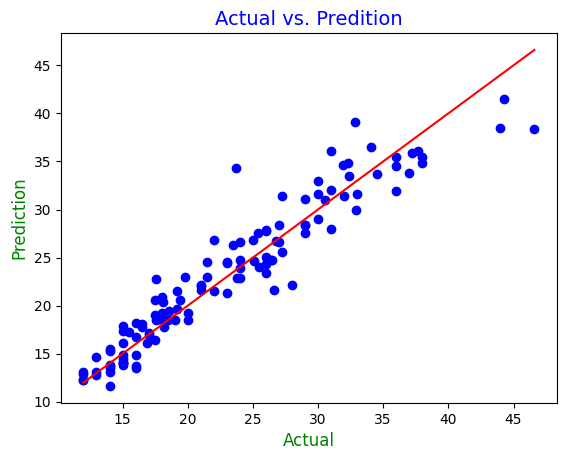

In [1403]:
plt.scatter(x=y_test,y=pred_bagging,color='blue')
plt.xlabel('Actual',color='green',fontsize=12)
plt.ylabel('Prediction',color='green',fontsize=12)
plt.title('Actual vs. Predition',color='blue',fontsize=14)
xp=np.linspace(y_test.min(),y_test.max(),100)
plt.plot(xp,xp,color='red')

# RandomForest

In [1404]:
from sklearn.ensemble import RandomForestRegressor

In [1405]:
rfr=RandomForestRegressor(n_estimators=500, min_samples_leaf=1,max_features=5,random_state=101)

## K flod cross validation for RandomForest

In [1406]:
import itertools
n_estimators=[50,100,150]
min_samples_leaf=[10,15,20]
grid=list(itertools.product(n_estimators,min_samples_leaf))
grid=pd.DataFrame(grid,index=range(1,10),columns=['n_estimators','min_samples_leaf'])
grid

,n_estimators,min_samples_leaf
1,50,10
2,50,15
3,50,20
4,100,10
5,100,15
6,100,20
7,150,10
8,150,15
9,150,20


from sklearn.model_selection import cross_val_score
er=[]
for i in range(1,10):
    rfr=RandomForestRegressor(n_estimators=grid.loc[i,'n_estimators'],
                               min_samples_leaf=grid.loc[i,'min_samples_leaf'],
                               max_features=4,random_state=101
                             )
    Scores=cross_val_score(rfr,X=X_train,y=y_train.values.ravel(),
                           cv=10,scoring='neg_mean_squared_error')
    er.append(-np.mean(Scores));

In [1407]:
# k fold cross validtion
from sklearn.model_selection import cross_val_score
er=[]
for i in range(1,10):
    rfr=RandomForestRegressor(n_estimators=grid.loc[i,'n_estimators'],
                               min_samples_leaf=grid.loc[i,'min_samples_leaf'],
                               max_features=5,random_state=101
                             )
    Scores=cross_val_score(rfr,X=X_train,y=y_train.values.ravel(),
                           cv=10,scoring='neg_mean_squared_error')
    er.append(-np.mean(Scores));

In [1408]:
er

[9.733380031818244,
 10.872035397870087,
 12.349262175722405,
 9.737782430968743,
 10.720864530590614,
 12.22744087179905,
 9.843649183861523,
 10.891317337550541,
 12.376863853893695]

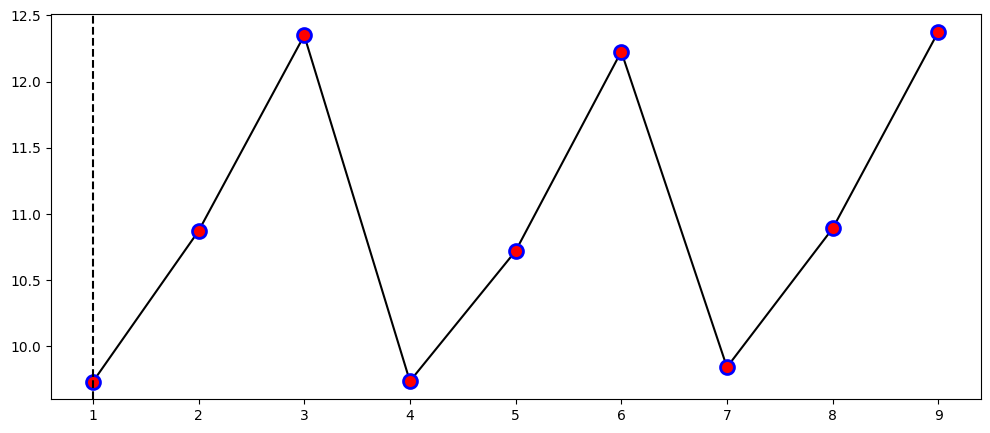

In [1409]:
plt.figure(figsize=(12,5))
plt.plot(range(1,10),er,marker='o',markersize=10,
         markerfacecolor='red',color='black',
        markeredgecolor='blue',markeredgewidth=2)
plt.axvline(np.argmin(er)+1,linestyle='--',color='black')

### the best model of RandomForest

In [1410]:
rfr=RandomForestRegressor(n_estimators=grid.loc[1,'n_estimators'],
                               min_samples_leaf=grid.loc[1,'min_samples_leaf'],
                               max_features=5,random_state=101)

In [1411]:
rfr.fit(X_train,y_train.values.ravel())

RandomForestRegressor(max_features=5, min_samples_leaf=10, n_estimators=50,
                      random_state=101)

### The importance of variable

In [1412]:
rfr.feature_importances_
importance=pd.DataFrame(rfr.feature_importances_,index=[X_train.columns],columns=["importance"])
importance

,importance
displacement,0.330550
cylinders,0.102331
horsepower,0.219347
model_year,0.127215
weight,0.219610
origin,0.000947


تاثیر بیشتری داشته اند   mpg  هستیم در اینجا میبینم که متغیرهای زیر به ترتیب در miles per gallon باتوجه به اینکه ما بدنبال پیش بینی میزان مصرف اتومیبل 
* displacement
* weight
* horsepower
* model_year
* cylinders

<Figure size 1200x500 with 0 Axes>

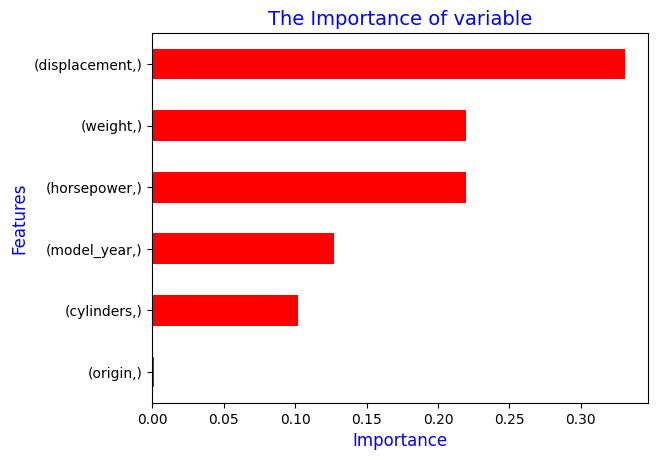

In [1413]:
plt.figure(figsize=(12,5))
importance.sort_values(by='importance',ascending=True).plot(kind='barh',color='red',legend=None)
plt.xlabel('Importance',color='blue',fontsize=12)
plt.ylabel('Features',color='blue',fontsize=12)
plt.title('The Importance of variable',color='blue',fontsize=14);

## Prediction on test data

In [1414]:
pred_rfr=rfr.predict(X_test)
pred_rfr

array([24.28242667, 20.0108813 , 36.59030583, 12.70824959, 12.76651037,
       23.44404675, 34.87446458, 24.1347563 , 29.70587434, 24.03359745,
       23.93453339, 27.57386265, 35.22213888, 30.25184422, 15.32238405,
       16.17099313, 19.25874499, 18.29304206, 23.4971674 , 24.11483417,
       12.55358824, 22.81440556, 30.81590485, 17.13127102, 15.32500715,
       30.36237703, 24.40448032, 31.23114923, 17.33014925, 12.46260358,
       20.08351421, 36.98798753, 23.68796158, 24.92381736, 23.66105942,
       14.10660572, 26.63945837, 31.84574524, 14.99144479, 23.58971476,
       34.51055574, 15.21423781, 26.37128973, 15.02619154, 19.29845705,
       18.28832264, 26.77865307, 22.42021172, 17.31999208, 35.63062383,
       20.03233125, 19.85541896, 19.9791278 , 24.65750579, 15.71548676,
       27.28754218, 36.84987992, 30.03054501, 17.45325682, 32.37023161,
       25.13373099, 29.21653662, 36.77502081, 18.9139438 , 20.28780564,
       21.84057603, 30.32015625, 36.17107737, 13.46422108, 14.16

In [1415]:
modes_evaluate=modes_evaluate.append(pd.DataFrame({'MAE':metrics.mean_absolute_error(y_test,pred_rfr),
                           'MSE': metrics.mean_squared_error(y_test,pred_rfr),
                           'RMSE':np.sqrt(metrics.mean_squared_error(y_test,pred_rfr))}, 
                                                  index=['Random Forest']))
modes_evaluate

,MAE,MSE,RMSE
Linear Regression,2.533259,11.406889,3.377409
Ridge Regression,2.532992,11.381738,3.373683
Lasso Regression,2.533258,11.406501,3.377351
Decision Tree Regression,2.269258,9.605827,3.099327
Bagging,1.792780,5.930746,2.435312
Random Forest,1.943353,7.256899,2.693863


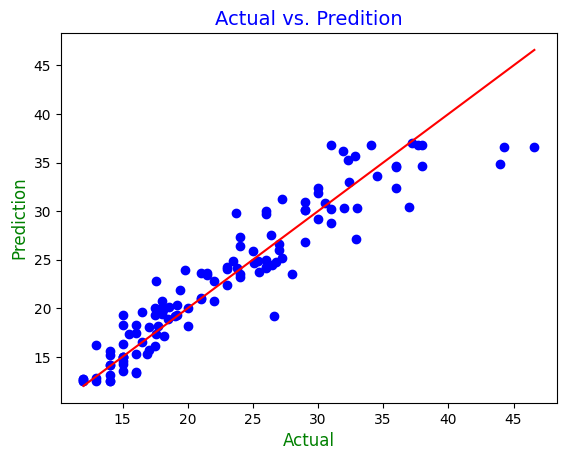

In [1416]:
plt.scatter(x=y_test,y=pred_rfr,color='blue')
plt.xlabel('Actual',color='green',fontsize=12)
plt.ylabel('Prediction',color='green',fontsize=12)
plt.title('Actual vs. Predition',color='blue',fontsize=14)
xp=np.linspace(y_test.min(),y_test.max(),100)
plt.plot(xp,xp,color='red')

## GB Regression

In [1417]:
from sklearn.ensemble import GradientBoostingRegressor

In [1418]:
gbr_reg=GradientBoostingRegressor(learning_rate=0.1,
                                 # learning rate
                                 n_estimators=1000,
                                 subsample=1,  
                                 max_depth=4,
                                 min_samples_leaf=5,
                                 random_state=101)

In [1419]:
gbr_reg.fit(X_train,y_train.values.ravel())

GradientBoostingRegressor(max_depth=4, min_samples_leaf=5, n_estimators=1000,
                          random_state=101, subsample=1)

### K fold cross validation

In [1420]:
import itertools
learning_rate=[.001,.01,.1]
subsample=[.5,.7,.9]
max_depth=[1,3,5]
grid=list(itertools.product(learning_rate,subsample,max_depth))
grid=pd.DataFrame(grid,index=range(1,28),columns=['learning_rate','subsample','max_depth'])
grid

,learning_rate,subsample,max_depth
1,0.001,0.5,1
2,0.001,0.5,3
3,0.001,0.5,5
4,0.001,0.7,1
5,0.001,0.7,3
6,0.001,0.7,5
7,0.001,0.9,1
8,0.001,0.9,3
9,0.001,0.9,5
10,0.010,0.5,1


In [1421]:
from sklearn.model_selection import cross_val_score
er=[]
for i in range(1,28):
    gbr_reg=GradientBoostingRegressor(learning_rate=grid.loc[i,'learning_rate'],
                                      subsample=grid.loc[i,'subsample'],
                                  max_depth=grid.loc[i,'max_depth'],random_state=101)
    Scores=cross_val_score(gbr_reg,X=X_train,y=y_train.values.ravel(),
                           cv=10,scoring='neg_mean_squared_error')
    er.append(-np.mean(Scores))
    

In [1422]:
er

[54.58979448317753,
 51.84264561710567,
 51.2673615484941,
 54.66287252182125,
 51.87008048017948,
 51.16830738249123,
 54.715248878605735,
 51.919697911638266,
 51.115711413955644,
 27.22967365504396,
 16.98415177854384,
 15.810875075499379,
 27.846485794773628,
 17.143634484400245,
 15.57985671556664,
 28.45343340717661,
 17.36574044416708,
 15.501976460121236,
 9.071350993230705,
 9.70219995553794,
 9.736940997849493,
 9.42251795875666,
 9.37557014638605,
 9.775481612138767,
 9.684904183009593,
 8.907785373735015,
 9.551479635761938]

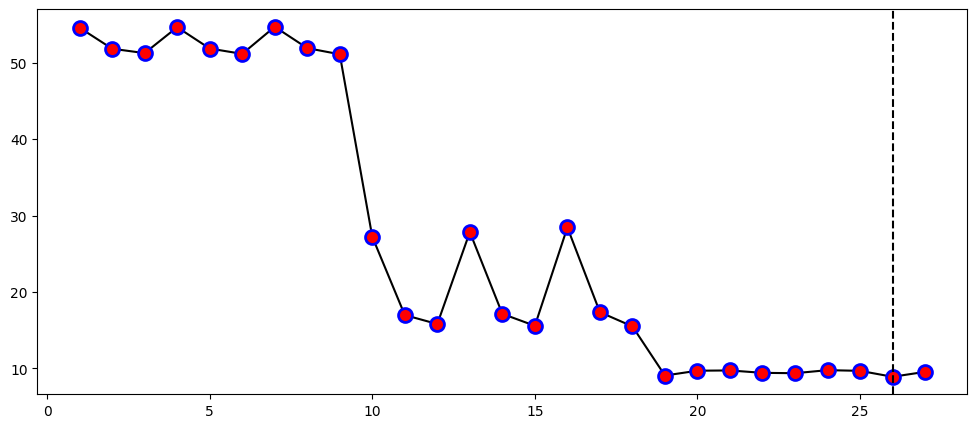

In [1423]:
plt.figure(figsize=(12,5))
plt.plot(range(1,28),er,marker='o',markersize=10,
         markerfacecolor='red',color='black',
        markeredgecolor='blue',markeredgewidth=2)
plt.axvline(np.argmin(er)+1,linestyle='--',color='black')

# Apply the best model

In [1424]:
gbr_reg=GradientBoostingRegressor(learning_rate=grid.loc[26,'learning_rate'],
                                      subsample=grid.loc[26,'subsample'],
                                  max_depth=grid.loc[26,'max_depth'],random_state=101 )

In [1425]:
gbr_reg.fit(X_train,y_train.values.ravel())

GradientBoostingRegressor(random_state=101, subsample=0.9)

In [1426]:
pred_gbr=gbr_reg.predict(X_test)
pred_gbr

array([24.24554137, 19.97312493, 38.18874938, 12.42145918, 12.7249583 ,
       24.61107757, 34.95971039, 23.31510216, 28.68163632, 23.93587442,
       25.25025012, 25.98820765, 34.8146018 , 32.02643411, 17.50887264,
       15.68424523, 16.72525291, 18.12238001, 21.4366258 , 21.87990491,
       12.39992286, 24.83070308, 30.13052414, 18.53733885, 15.20811002,
       32.18809665, 24.25457667, 30.80625729, 15.85809148, 12.36380175,
       19.24103059, 36.73790598, 22.80865374, 24.27841326, 25.08568309,
       13.76956582, 28.42679321, 32.26633624, 14.08239001, 21.35641116,
       33.73696801, 14.08239001, 24.85687111, 13.59704418, 21.66834835,
       17.60812333, 27.02880905, 21.06587528, 18.34817485, 35.59751022,
       19.88840701, 18.8647418 , 19.5612129 , 26.03161492, 16.4132522 ,
       25.79412347, 35.36625018, 28.58266482, 16.90856718, 30.90053603,
       28.05724417, 29.29297452, 36.54275722, 18.7573334 , 19.59984983,
       20.41980848, 30.51833658, 34.67557672, 13.49554136, 13.70

In [1427]:
modes_evaluate=modes_evaluate.append(pd.DataFrame({'MAE':metrics.mean_absolute_error(y_test,pred_gbr),
                           'MSE': metrics.mean_squared_error(y_test,pred_gbr),
                           'RMSE':np.sqrt(metrics.mean_squared_error(y_test,pred_gbr))}, 
                                                  index=['GB reg']))
modes_evaluate

,MAE,MSE,RMSE
Linear Regression,2.533259,11.406889,3.377409
Ridge Regression,2.532992,11.381738,3.373683
Lasso Regression,2.533258,11.406501,3.377351
Decision Tree Regression,2.269258,9.605827,3.099327
Bagging,1.792780,5.930746,2.435312
Random Forest,1.943353,7.256899,2.693863
GB reg,1.923127,6.921323,2.630841


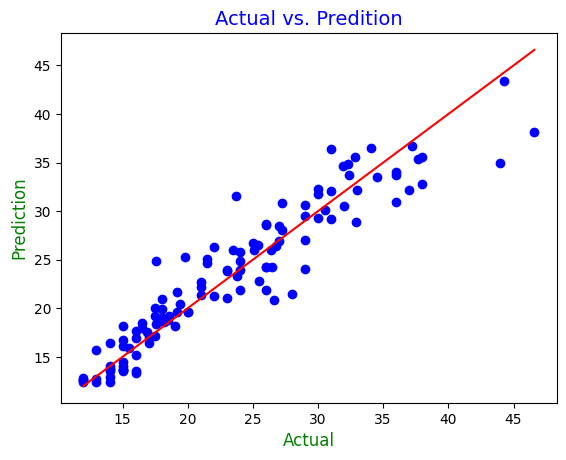

In [1428]:
plt.scatter(x=y_test,y=pred_gbr,color='blue')
plt.xlabel('Actual',color='green',fontsize=12)
plt.ylabel('Prediction',color='green',fontsize=12)
plt.title('Actual vs. Predition',color='blue',fontsize=14)
xp=np.linspace(y_test.min(),y_test.max(),100)
plt.plot(xp,xp,color='red')

# XGBoost Regression 

In [1429]:
!pip install xgboost


[notice] A new release of pip available: 22.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1430]:
from xgboost import XGBRegressor

In [1431]:
xgb_reg=XGBRegressor(max_depth=4,
                    learning_rate=.01,
                    subsample=.9,
                       reg_lambda=.1,
                    random_state=101
                     
                    )

In [1432]:
xgb_reg.fit(X_train,y_train.values.ravel());

In [1433]:
import itertools
learning_rate=[.001,.01,.1]
subsample=[.5,.7,.9]
max_depth=[3,4,5]
grid=list(itertools.product(learning_rate,subsample,max_depth))
grid=pd.DataFrame(grid,index=range(1,28),columns=['learning_rate','subsample','max_depth'])
grid

,learning_rate,subsample,max_depth
1,0.001,0.5,3
2,0.001,0.5,4
3,0.001,0.5,5
4,0.001,0.7,3
5,0.001,0.7,4
6,0.001,0.7,5
7,0.001,0.9,3
8,0.001,0.9,4
9,0.001,0.9,5
10,0.010,0.5,3


In [1434]:
from sklearn.model_selection import cross_val_score
er=[]
for i in range(1,28):
    xgb_reg=XGBRegressor(learning_rate=grid.loc[i,'learning_rate'],
                                      subsample=grid.loc[i,'subsample'],
                                  max_depth=grid.loc[i,'max_depth'],random_state=101 )
    Scores=cross_val_score(xgb_reg,X=X_train,y=y_train.values.ravel(),
                           cv=10,scoring='neg_mean_squared_error')
    er.append(-np.mean(Scores))

In [1435]:
er

[494.43732543697877,
 494.43732543697877,
 494.43732543697877,
 494.03705743954754,
 494.03705743954754,
 494.03705743954754,
 493.5353347516287,
 493.5339828948202,
 493.5339828948202,
 97.52431735936426,
 97.6068403339444,
 97.61670549668833,
 96.33794945576535,
 96.32587219079689,
 96.33688670659625,
 94.99767279953014,
 94.93272110177529,
 94.94498302833709,
 8.809577720263727,
 8.88707339001419,
 9.114259889425217,
 9.033881268827368,
 9.246987047364982,
 9.22889183109603,
 8.730554176027768,
 9.38201345058615,
 9.497250001622607]

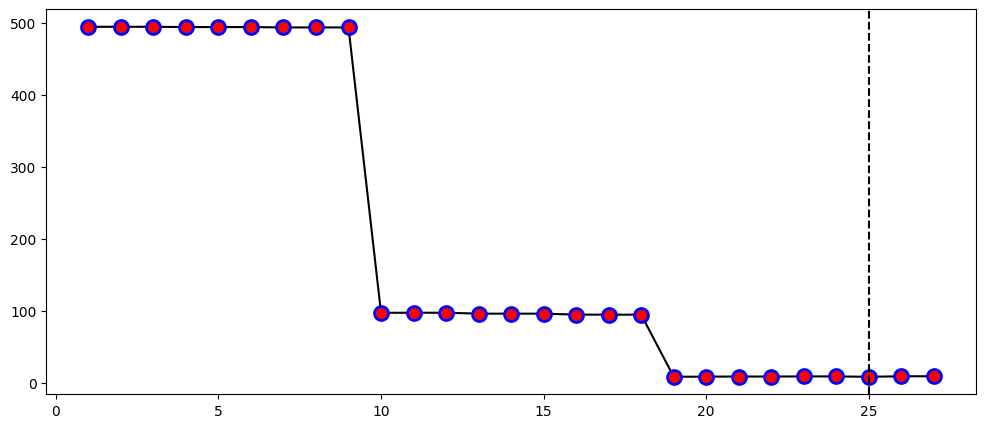

In [1436]:
plt.figure(figsize=(12,5))
plt.plot(range(1,28),er,marker='o',markersize=10,
         markerfacecolor='red',color='black',
        markeredgecolor='blue',markeredgewidth=2)
plt.axvline(np.argmin(er)+1,linestyle='--',color='black')

# Apply the best model

In [1437]:
gbr_reg=GradientBoostingRegressor(learning_rate=grid.loc[25,'learning_rate'],
                                      subsample=grid.loc[25,'subsample'],
                                  max_depth=grid.loc[25,'max_depth'],random_state=101 )

In [1438]:
gbr_reg.fit(X_train,y_train.values.ravel())

GradientBoostingRegressor(random_state=101, subsample=0.9)

In [1439]:
pred_gbr=gbr_reg.predict(X_test)
pred_gbr

array([24.24554137, 19.97312493, 38.18874938, 12.42145918, 12.7249583 ,
       24.61107757, 34.95971039, 23.31510216, 28.68163632, 23.93587442,
       25.25025012, 25.98820765, 34.8146018 , 32.02643411, 17.50887264,
       15.68424523, 16.72525291, 18.12238001, 21.4366258 , 21.87990491,
       12.39992286, 24.83070308, 30.13052414, 18.53733885, 15.20811002,
       32.18809665, 24.25457667, 30.80625729, 15.85809148, 12.36380175,
       19.24103059, 36.73790598, 22.80865374, 24.27841326, 25.08568309,
       13.76956582, 28.42679321, 32.26633624, 14.08239001, 21.35641116,
       33.73696801, 14.08239001, 24.85687111, 13.59704418, 21.66834835,
       17.60812333, 27.02880905, 21.06587528, 18.34817485, 35.59751022,
       19.88840701, 18.8647418 , 19.5612129 , 26.03161492, 16.4132522 ,
       25.79412347, 35.36625018, 28.58266482, 16.90856718, 30.90053603,
       28.05724417, 29.29297452, 36.54275722, 18.7573334 , 19.59984983,
       20.41980848, 30.51833658, 34.67557672, 13.49554136, 13.70

### Bagging has the least metrics from others after that:  
* GB reg , XG Boost
* Random forest
* Decision tree
* Lasso, Ridge, Linear regression


In [1461]:
modes_evaluate=modes_evaluate.append(pd.DataFrame({'MAE':metrics.mean_absolute_error(y_test,pred_gbr),
                           'MSE': metrics.mean_squared_error(y_test,pred_gbr),
                           'RMSE':np.sqrt(metrics.mean_squared_error(y_test,pred_gbr))}, 
                                                  index=['XG_Boost']))
modes_evaluate

,MAE,MSE,RMSE
Linear Regression,2.533259,11.406889,3.377409
Ridge Regression,2.532992,11.381738,3.373683
Lasso Regression,2.533258,11.406501,3.377351
Decision Tree Regression,2.269258,9.605827,3.099327
Bagging,1.792780,5.930746,2.435312
Random Forest,1.943353,7.256899,2.693863
GB reg,1.923127,6.921323,2.630841
XG_Boost,1.923127,6.921323,2.630841
XG_Boost,1.923127,6.921323,2.630841


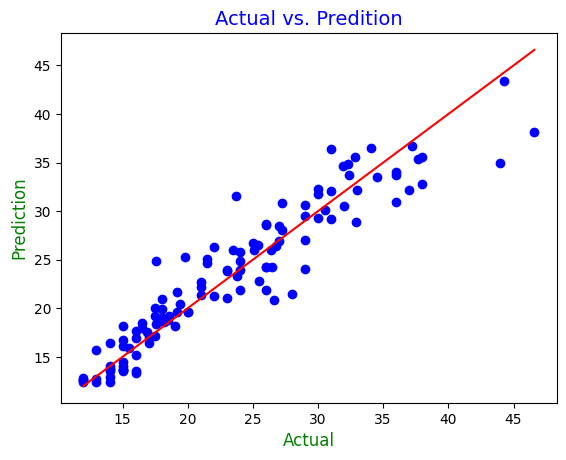

In [1441]:
plt.scatter(x=y_test,y=pred_gbr,color='blue')
plt.xlabel('Actual',color='green',fontsize=12)
plt.ylabel('Prediction',color='green',fontsize=12)
plt.title('Actual vs. Predition',color='blue',fontsize=14)

# Add 45 degree line
xp=np.linspace(y_test.min(),y_test.max(),100)
plt.plot(xp,xp,color='red')

In [1442]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train_,y_train)
y_pred = poly_clf.predict(X_test_)
print("The improved accuracy of the model is",(poly_clf.score(X_test_,y_test)))

The improved accuracy of the model is 0.8762724729469349


In [1443]:
print("The improved accuracy of the model is",(poly_clf.score(X_test_,y_test)))

The improved accuracy of the model is 0.8762724729469349
